<a href="https://colab.research.google.com/github/youbo71/Data_EPF/blob/master/Projet_Covid_Agathe_MERY_Youen_BOENNEC_GrpA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET DATA-SCIENCE**

**Agathe MERY & Youen BOENNEC - Groupe A3 -**

*Objectifs* : 

- Traiter et analyser les données
- Trouver des informations dans les données sur les personnes qui sont le plus à risque à cause du coronavirus et les facteurs qui augmentent ces risques.
- Prédire l'évolution de l'épidémie

Lors de ce projet, nous allons dans une **première partie** étudier l'évolution générale du Covid-19 au sein de la population mondiale (de son apparition en janvier 2020 à son développement jusqu’à fin avril, où nous avons pris les données s'arrêtant le 28 avril 2020). Puis nous nous baserons sur les pays Européens pour effectuer notre analyse.
Dans une **deuxième partie** nous verrons les personnes les plus à risques face au Covid-19. Enfin, dans une **troisième partie** nous prédirons l'évolution de ce virus et le nombre de cas confirmés que pourrait atteindre les pays, notamment ceux Européens. 

# **Première Partie : Evolution générale et des pays Européens**

> ### 1.1 *Import des différentes librairies nécessaires pour la première partie*.

In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as hist
from google.colab import files
from google.colab import drive
from scipy.stats import linregress
from scipy import stats
from scipy.optimize import curve_fit

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> ### 1.2 *Création de différents sous fichiers pour vérifier le contenu des fichiers csv importés et effectuer un tri et un regroupement d'informations*.

In [0]:
## Création de 2 listes
# Regrouper les pays de l'Europe et ceux de l'Union Européenne pour des analyses plus précises par la suite

# Create a list of European countries
Europe = ["Albania",
"Andorra",
"Armenia",
"Austria",
"Azerbaijan",
"Belarus",
"Belgium",
"Bosnia and Herzegovina",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Georgia",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Italy",
"Kazakhstan",
"Kosovo",
"Latvia",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Malta",
"Moldova",
"Monaco",
"Montenegro",
"Netherlands",
"North Macedonia",
"Norway",
"Poland",
"Portugal",
"Romania",
"Russia",
"San Marino",
"Serbia",
"Slovakia",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"Ukraine", 
"United Kingdom",
"Vatican City"
]

# Create a list of European Union countries
EU = ["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovakia",
"Slovenia",
"Spain",
"Sweden" 
]

In [0]:
#_1_#################################################################################################
# Create datafiles for deaths, confirmed, recovered cases with all times
#####################################################################################################

# Recovering files
dataD = pd.read_csv('/content/drive/My Drive/Colab Notebooks/time_series_covid19_deaths_global.csv', sep=',', header=0)
dataC = pd.read_csv('/content/drive/My Drive/Colab Notebooks/time_series_covid19_confirmed_global.csv', sep=',', header=0)
dataR = pd.read_csv('/content/drive/My Drive/Colab Notebooks/time_series_covid19_recovered_global.csv', sep=',', header=0)

# Drop unnecessary columns
dataD.drop(['Lat', 'Long'], axis=1, inplace=True)
dataC.drop(['Lat', 'Long'], axis=1, inplace=True)
dataR.drop(['Lat', 'Long'], axis=1, inplace=True)

# Change the 2nd column name
dataD.columns.values[1] = "Country"
dataC.columns.values[1] = "Country"
dataR.columns.values[1] = "Country"

# Assign Country="San Marino" to Country="Italy"
dataD.loc[dataD['Country'] == 'San Marino', 'Country'] = 'Italy'
dataC.loc[dataC['Country'] == 'San Marino', 'Country'] = 'Italy'
dataR.loc[dataR['Country'] == 'San Marino', 'Country'] = 'Italy'

# Assign Country="Vatican City" to Country="Italy"
dataD.loc[dataD['Country'] == 'Vatican City', 'Country'] = 'Italy'
dataC.loc[dataC['Country'] == 'Vatican City', 'Country'] = 'Italy'
dataR.loc[dataR['Country'] == 'Vatican City', 'Country'] = 'Italy'

# Assign Country="Monaco" to Country="France"
dataD.loc[dataD['Country'] == 'Monaco', 'Country'] = 'France'
dataC.loc[dataC['Country'] == 'Monaco', 'Country'] = 'France'
dataR.loc[dataR['Country'] == 'Monaco', 'Country'] = 'France'

# Assign Country="Liechtenstein" to Country="Austria"
dataD.loc[dataD['Country'] == 'Liechtenstein', 'Country'] = 'Austria'
dataC.loc[dataC['Country'] == 'Liechtenstein', 'Country'] = 'Austria'
dataR.loc[dataR['Country'] == 'Liechtenstein', 'Country'] = 'Austria'

# Assign Country="Andorra" to Country="Spain"
dataD.loc[dataD['Country'] == 'Andorra', 'Country'] = 'Spain'
dataC.loc[dataC['Country'] == 'Andorra', 'Country'] = 'Spain'
dataR.loc[dataR['Country'] == 'Andorra', 'Country'] = 'Spain'

# Aggregate numbers by variable "Country"
dataD_grouped = dataD.groupby(['Country']).sum().reset_index()
dataC_grouped = dataC.groupby(['Country']).sum().reset_index()
dataR_grouped = dataR.groupby(['Country']).sum().reset_index()

In [0]:
# Check
dataD_grouped

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425
3,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4,4,4,4,2,2
177,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3


In [0]:
# Create hard .csv files with all times data for deaths, confirmed, recovered cases

path = '/content/drive/My Drive/Colab Notebooks/'

dataD_grouped.to_csv(path + 'all_data_D_times.csv')
dataC_grouped.to_csv(path + 'all_data_C_times.csv')
dataR_grouped.to_csv(path + 'all_data_R_times.csv')

In [0]:
#_2_#################################################################################################
# Create datafiles for deaths, confirmed, recovered cases from dataD/C/R files 
# and introduce European countries Yes/No as new columns
#####################################################################################################

dataD_groupedE = dataD_grouped.copy()
dataD_groupedE['Europe'] = np.where(dataD_grouped['Country'].isin(Europe), 'Yes', 'No') 
dataD_groupedE['EU']     = np.where(dataD_grouped['Country'].isin(EU),     'Yes', 'No') 

dataC_groupedE = dataC_grouped.copy()
dataC_groupedE['Europe'] = np.where(dataC_grouped['Country'].isin(Europe), 'Yes', 'No') 
dataC_groupedE['EU']     = np.where(dataC_grouped['Country'].isin(EU),     'Yes', 'No') 

dataR_groupedE = dataR_grouped.copy()
dataR_groupedE['Europe'] = np.where(dataR_grouped['Country'].isin(Europe), 'Yes', 'No') 
dataR_groupedE['EU']     = np.where(dataR_grouped['Country'].isin(EU),     'Yes', 'No') 

In [0]:
# Check
dataD_grouped

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425
3,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4,4,4,4,2,2
177,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3


In [0]:
# Create hard .csv files with all times data for deaths, confirmed, recovered cases
# and European countries Yes/no

path = '/content/drive/My Drive/Colab Notebooks/'

dataD_groupedE.to_csv(path + 'all_data_D_times&European.csv')
dataC_groupedE.to_csv(path + 'all_data_C_times&European.csv')
dataR_groupedE.to_csv(path + 'all_data_R_times&European.csv')

In [0]:
#_3_################################################################################
# Create a global file with TOTAL of cases observed along time, adding all countries
####################################################################################

# Drop non numerical column "Country"
dataD_N = dataD_grouped.drop("Country", axis=1)
dataC_N = dataC_grouped.drop("Country", axis=1)
dataR_N = dataR_grouped.drop("Country", axis=1)

# Include a new row with totals in each column
dataD_N = dataD_N.append(dataD_N.sum(),ignore_index=True)
dataC_N = dataC_N.append(dataC_N.sum(),ignore_index=True)
dataR_N = dataR_N.append(dataR_N.sum(),ignore_index=True)

# Select the last new row of totals and create a new column for differents cases
totD = dataD_N.tail(1)
totD.insert(0, "Cases", "Deaths")
totC = dataC_N.tail(1)
totC.insert(0, "Cases", "Confirmed")
totR = dataR_N.tail(1)
totR.insert(0, "Cases", "Recovered")

# Set a global file by appending
tot = totD
tot = tot.append(totC)
tot = tot.append(totR)

In [0]:
# Check
tot

,Cases,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
181,Deaths,17,18,26,42,56,82,131,133,171,213,259,362,426,492,564,634,719,806,906,1013,1113,1118,1371,1523,1666,1770,1868,2007,2122,2247,2251,2458,2469,2629,2708,2770,2814,2872,2941,...,8733,9867,11299,12973,14651,16505,18625,21181,23970,27198,30652,33925,37582,42108,47183,52986,58790,64607,69374,74565,81937,88347,95521,102534,108511,114100,119491,125995,134189,143814,153835,159509,165043,169985,176582,183064,190857,197004,202844,206542
181,Confirmed,555,654,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19881,23892,27635,30794,34391,37120,40150,42762,44802,45221,60368,66885,69030,71224,73258,75136,75639,76197,76819,78572,78958,79561,80406,81388,82746,84112,86011,...,214821,242570,272208,304507,336953,378231,418041,467653,529591,593291,660693,720140,782389,857487,932475,1013326,1095698,1175857,1249484,1321131,1396092,1479804,1565278,1657526,1735650,1834721,1904838,1975195,2055057,2151421,2239144,2316716,2400078,2471247,2548091,2623049,2707728,2809499,2896744,2971475
181,Recovered,28,30,36,39,52,61,107,126,143,222,284,472,623,852,1124,1487,2011,2616,3244,3946,4683,5150,6295,8058,9395,10865,12583,14352,16121,18177,18890,22886,23394,25227,27905,30384,33277,36711,39782,...,83312,84975,87420,91692,97899,98351,108000,113787,122150,130915,139415,149082,164566,178034,193177,210263,225796,246152,260012,276515,300054,328661,353975,376096,402110,421722,448655,474261,511019,542107,568343,592319,623903,645905,680390,710502,739409,790081,817838,865733


In [0]:
# Create hard .csv file with totals over times for deaths, confirmed, recovered cases

path = '/content/drive/My Drive/Colab Notebooks/'
tot.to_csv(path + 'all_data_time_series.csv')

In [0]:
#_4_################################################################################
# Create a global file of only LAST cumulative numbers 
# with separate columns for deaths, confirmed, recovered cases
# and ordered by Countries
####################################################################################

# From "_grouped" files, keep "Country" as index and LAST (final date) cumulative numbers
dataD_reduced = dataD_grouped[['Country',dataD_grouped.columns[-1]]]
dataC_reduced = dataC_grouped[['Country',dataC_grouped.columns[-1]]]
dataR_reduced = dataR_grouped[['Country',dataR_grouped.columns[-1]]]

# Change the header of the final date column
dataD_reduced.columns.values[1] = "Deaths"
dataC_reduced.columns.values[1] = "Confirmed"
dataR_reduced.columns.values[1] = "Recovered"

# Create a common file by merging by Country
dataDCR = dataD_reduced.merge(dataC_reduced, on = 'Country', how = 'outer')
dataDCR = dataDCR.merge(dataR_reduced, on = 'Country', how = 'outer')

# Specify in common file which country is European or in Union
dataDCR['Europe'] = np.where(dataDCR['Country'].isin(Europe), 'Yes', 'No') 
dataDCR['EU']     = np.where(dataDCR['Country'].isin(EU),     'Yes', 'No') 

In [0]:
# Check
dataDCR

,Country,Deaths,Confirmed,Recovered,Europe,EU
0,Afghanistan,50,1531,207,No,No
1,Albania,28,726,410,Yes,No
2,Algeria,425,3382,1508,No,No
3,Angola,2,26,6,No,No
4,Antigua and Barbuda,3,24,11,No,No
...,...,...,...,...,...,...
176,West Bank and Gaza,2,342,83,No,No
177,Western Sahara,0,6,5,No,No
178,Yemen,0,1,1,No,No
179,Zambia,3,88,42,No,No


In [0]:
# Create hard .csv file with all last data for deaths, confirmed, recovered cases, by countries

path = '/content/drive/My Drive/Colab Notebooks/'
dataDCR.to_csv(path + 'all_data_DCR_last.csv')

> ### 1.3 *Analyse de l'évolution générale du Covid-19 au sein de la population mondiale*.

- En observant les données de manière générale, on peut s’apercevoir que celles des premiers jours de chaque pays en janvier sont très faibles par rapport aux résultats du mois d'avril.

- Il n’est donc pas souhaitable de représenter son évolution en prenant l’ensemble des pays et les données jour après jour : les premières valeurs seraient totalement écrasées, et aucune analyse ne pourrait être faite.

- Il est important dans un premier temps d’avoir une vision globale de l’évolution du nombre de personnes atteintes, décédées et guéries par jour, tous pays confondus. Ceci permet de visualiser une tendance ou non au cours du temps, et notamment, d’observer des possibles pallier.

- Pour cela, une somme des données par colonne a été effectuée, c’est-à-dire la somme du nombre de personnes enregistrées chaque jour. Ainsi, on obtient un nombre total de personnes dans le monde par jour diagnostiquées comme ayant le virus (cas confirmé), décédées ou ayant montré des signes de guérisons ; qui est plus facilement comparable entre ces trois cas possibles (confirmé, décédé et guéri).

In [0]:
# Importing files
data_sum_total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_time_series.csv', sep=',', header=0)

# Drop unnecessary columns
data_sum_total.drop(data_sum_total.columns[0:2], axis=1, inplace=True)

# The dataframe index becomes a name and not a number
data_sum_total.index = ["Deaths","Confirmed","Recoverd"]

In [0]:
# Check
data_sum_total

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Deaths,17,18,26,42,56,82,131,133,171,213,259,362,426,492,564,634,719,806,906,1013,1113,1118,1371,1523,1666,1770,1868,2007,2122,2247,2251,2458,2469,2629,2708,2770,2814,2872,2941,2996,...,8733,9867,11299,12973,14651,16505,18625,21181,23970,27198,30652,33925,37582,42108,47183,52986,58790,64607,69374,74565,81937,88347,95521,102534,108511,114100,119491,125995,134189,143814,153835,159509,165043,169985,176582,183064,190857,197004,202844,206542
Confirmed,555,654,941,1434,2118,2927,5578,6166,8234,9927,12038,16787,19881,23892,27635,30794,34391,37120,40150,42762,44802,45221,60368,66885,69030,71224,73258,75136,75639,76197,76819,78572,78958,79561,80406,81388,82746,84112,86011,88369,...,214821,242570,272208,304507,336953,378231,418041,467653,529591,593291,660693,720140,782389,857487,932475,1013326,1095698,1175857,1249484,1321131,1396092,1479804,1565278,1657526,1735650,1834721,1904838,1975195,2055057,2151421,2239144,2316716,2400078,2471247,2548091,2623049,2707728,2809499,2896744,2971475
Recoverd,28,30,36,39,52,61,107,126,143,222,284,472,623,852,1124,1487,2011,2616,3244,3946,4683,5150,6295,8058,9395,10865,12583,14352,16121,18177,18890,22886,23394,25227,27905,30384,33277,36711,39782,42716,...,83312,84975,87420,91692,97899,98351,108000,113787,122150,130915,139415,149082,164566,178034,193177,210263,225796,246152,260012,276515,300054,328661,353975,376096,402110,421722,448655,474261,511019,542107,568343,592319,623903,645905,680390,710502,739409,790081,817838,865733


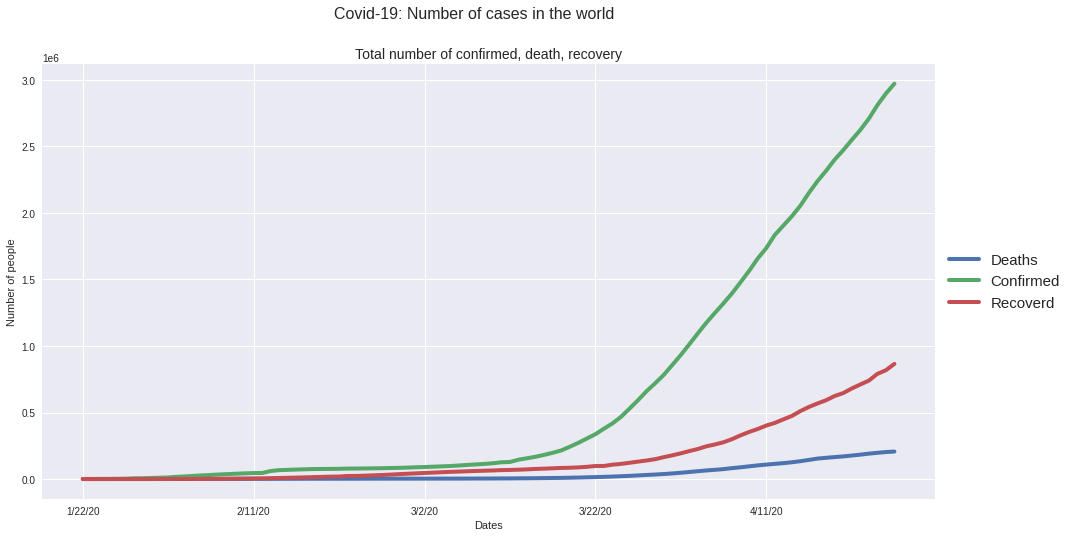

In [0]:
##########    Creation of graphics    ##########
# 'Total number of confirmed people in the world'
# 'Total number of death people in the world'
# 'Total number of recovery people in the world'

# Transposition of the dataframe
data_sum_total_transp = data_sum_total.transpose();

# Plotting values dataframe
plt.style.use('seaborn')
data_sum_total_transp.fillna(0).plot(figsize=(16, 8), linewidth = 4)
plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop = {'size': 15})
plt.suptitle('Covid-19: Number of cases in the world', fontsize=16)
plt.title('Total number of confirmed, death, recovery', fontsize=14)
plt.show()

On observe que le nombre de personnes guéries reste quand même largement supérieur au nombre de décès.

On peut remarquer sur les graphes, en plus d’une croissance évidente, une première tendance linéaire sur la période de janvier-février 2020, pour le nombre de cas confirmés et celui du nombre de morts. Ceci indique que la vitesse de propagation du Covid-19 est constante.

Puis il y a une seconde partie plutôt exponentielle à partir de mars. Le fait que la courbe augmente si rapidement peut-être expliquée par une prise de conscience de la gravité du virus, donc un dépistage davantage fait dans les pays. Un nombre important de personnes porteurses du virus aurait donc été détecté.

> ### *1.4 Analyse de l'évolution générale du Covid-19 au sein des pays Européens à un temps donné*.

De manière plus précise, il est intéressant d’analyser les données des pays à un temps précis. Il a donc été choisi de prendre les données au temps final de tous les pays, c’est-à-dire le 26 avril 2020, et d’observer les possibles relations qu’il existe.

Deux graphes ont été tracés : le nombre de décès en fonction du nombre de cas confirmés ; et le nombre de guéris en fonction du nombre de cas confirmés.

In [0]:
# Importing files
dataD_total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_D_times.csv', sep=',', header=0)
dataC_total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_C_times.csv', sep=',', header=0)
dataR_total = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_R_times.csv', sep=',', header=0)

# Drop unnecessary columns
dataD_total.drop(dataD_total.columns[:1], axis=1, inplace=True)
dataC_total.drop(dataC_total.columns[:1], axis=1, inplace=True)
dataR_total.drop(dataR_total.columns[:1], axis=1, inplace=True)

In [0]:
# Check
dataC_total

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26
4,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268,290,308,308,374,374,402,418,437,449,466,474,480,484,342,342
177,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
178,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
179,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,12,16,22,28,29,35,35,36,39,39,39,39,39,39,39,39,40,40,43,45,45,48,48,52,57,61,65,70,74,76,84,84,88


In [0]:
###############################    Creation of graphics    ###############################
# 'Number of death as a fonction of the number of cases confirmed in the world on 4/26/20'

# Retrieving the last column for confirmed and deceased cases
x = dataC_total['4/26/20'].values.tolist()
x = np.array(x)
y = dataD_total['4/26/20'].values.tolist()
y = np.array(y)

# Linear regression on the items on the list
regression = linregress(x,y)
pente = round(regression[0],5)
ordonnee_origine = regression[1]

# Minimum and maximum values of the abscissa
mn = np.min(x)
mx = np.max(x)

# Creation of two vectors
x_data = np.linspace(mn,mx,500)
y_data = pente*x_data + ordonnee_origine

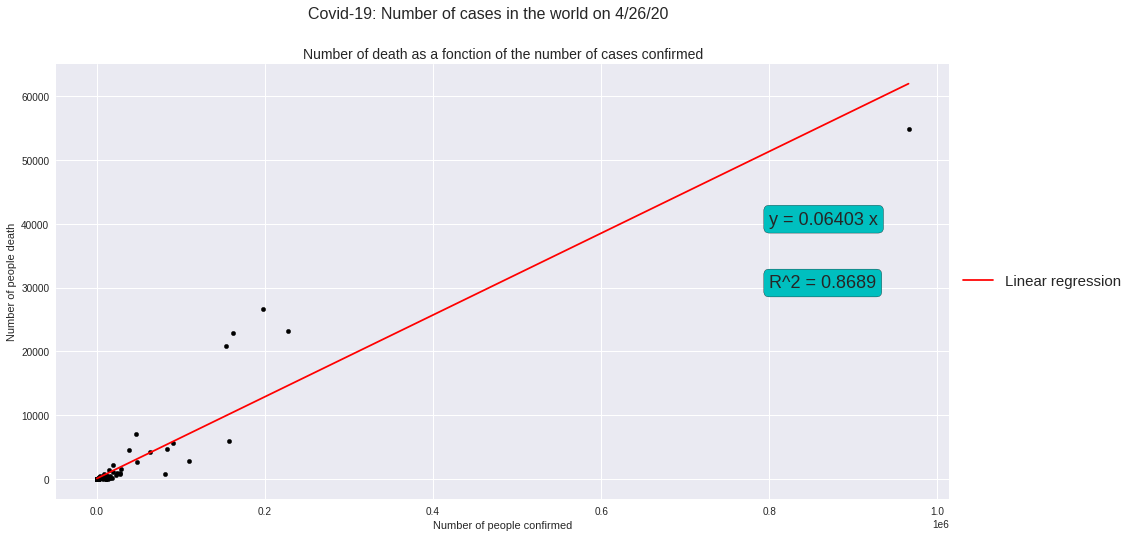

In [0]:
# Plotting values dataframe with scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color = 'black', s = 20,)
plt.plot(x_data, y_data, 'r', label = "Linear regression")
plt.xlabel('Number of people confirmed')
plt.ylabel('Number of people death')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop = {'size': 15})
plt.suptitle('Covid-19: Number of cases in the world on 4/26/20', fontsize=16)
plt.title('Number of death as a fonction of the number of cases confirmed', fontsize=14)

# Equation display
plt.text(800000, 40000, "y = " + str(pente) + " x", size=18, bbox=dict(boxstyle="round", ec=("k"), fc=("c")))

# Calculate the coefficient R squared
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#print(intercept)
#print ("R-squared: ",round((r_value**2),4))
plt.text(800000, 30000, "R^2 = " + str(round((r_value**2),4)), size=18, bbox=dict(boxstyle="round", ec=("k"), fc=("c")))

plt.show()

In [0]:
################################    Creation of graphics    ################################
# 'Number of recovery as a fonction of the number of cases confirmed in the world on 4/26/20'

# Retrieving the last column for confirmed and recovered cases
x = dataC_total['4/26/20'].values.tolist()
x = np.array(x)
y = dataR_total['4/26/20'].values.tolist()
y = np.array(y)

# Linear regression on the items on the list
regression = linregress(x,y)
pente = round(regression[0],5)
ordonnee_origine = regression[1]

# Minimum and maximum values of the abscissa
mn = np.min(x)
mx = np.max(x)

# Creation of two vectors
x_data = np.linspace(mn,mx,500)
y_data = pente*x_data + ordonnee_origine

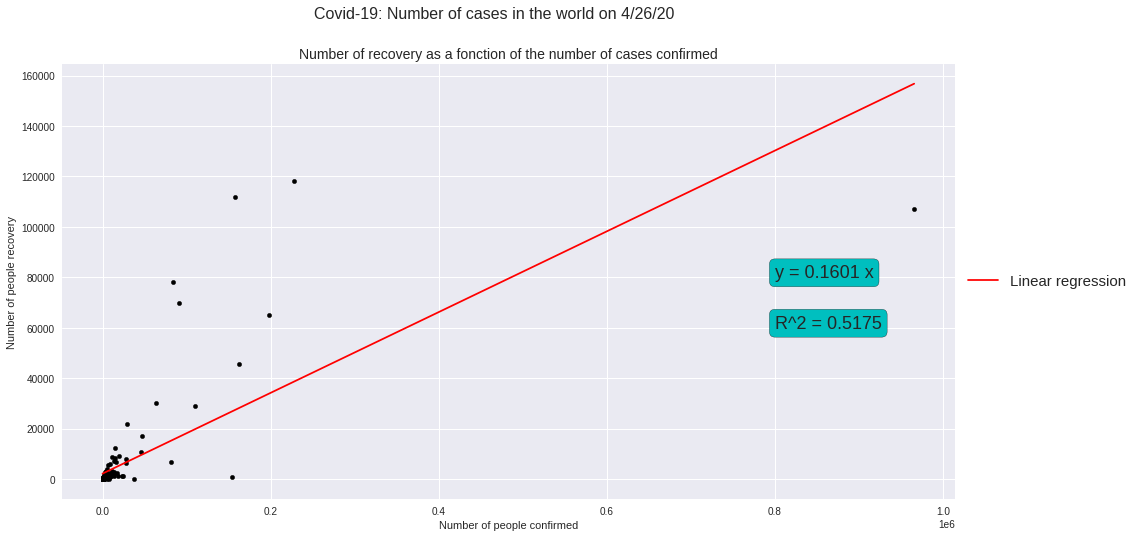

In [0]:
# Plotting values dataframe with scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color = 'black', s = 20,)
plt.plot(x_data, y_data, 'r', label = "Linear regression")
plt.xlabel('Number of people confirmed')
plt.ylabel('Number of people recovery')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop = {'size': 15})
plt.suptitle('Covid-19: Number of cases in the world on 4/26/20', fontsize=16)
plt.title('Number of recovery as a fonction of the number of cases confirmed', fontsize=14)

# Equation display
plt.text(800000, 80000, "y = " + str(pente) + " x", size=18, bbox=dict(boxstyle="round", ec=("k"), fc=("c")))

# Calculate the coefficient R squared
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#print(intercept)
#print ("R-squared: ",round((r_value**2),4))
plt.text(800000, 60000, "R^2 = " + str(round((r_value**2),4)), size=18, bbox=dict(boxstyle="round", ec=("k"), fc=("c")))

plt.show()

On s’aperçoit ici que les points se concentrent autour de la droite linéaire qui a été ajoutée. Le coefficient de corrélation R2 vaut 0.869. Celui-ci est proche de 1, on peut donc conclure qu’il y a une corrélation entre le nombre de décès et le nombre de personnes confirmées.

Cependant, la corrélation est biaisée du fait des valeurs très hautes pour les Etats Unis par exemple, et très basses pour beaucoup d’autres pays (beaucoup de pays ont été recensés avec 1 ou 2 cas de contamination ou de morts).

Avec l’équation de la droite, plus de 6% des personnes contaminées décèdent, alors que plus de 16% de personnes contaminées guérissent.

> ### *1.5 Intervalle de confiance et proportions de décès au sein des pays Européens*.

En observant les données, on remarque que la situation dans chaque pays est différente. Certains pays recensent une très forte progression du nombre de personnes atteintes du Covid-19.

C'est pourquoi, nous avons tracé les intervalles de confiance à 95% pour savoir si deux pays ou plusieurs sont significativement différents.

In [0]:
# Importing files
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_DCR_last.csv', sep=',', header=0)

# Drop unnecessary columns
data.drop(data.columns[0], axis=1, inplace=True)

In [0]:
# Check
data

,Country,Deaths,Confirmed,Recovered,Europe,EU
0,Afghanistan,50,1531,207,No,No
1,Albania,28,726,410,Yes,No
2,Algeria,425,3382,1508,No,No
3,Angola,2,26,6,No,No
4,Antigua and Barbuda,3,24,11,No,No
...,...,...,...,...,...,...
176,West Bank and Gaza,2,342,83,No,No
177,Western Sahara,0,6,5,No,No
178,Yemen,0,1,1,No,No
179,Zambia,3,88,42,No,No


In [0]:
# Proportion of Deaths within Confirmed 
data['f'] = data['Deaths']/data['Confirmed']

# Calculate CI following normal approximation
data['f_min'] = data['f'] - 1.96*np.sqrt((data['f']*(1-data['f']))/data['Confirmed'])
data['f_max'] = data['f'] + 1.96*np.sqrt((data['f']*(1-data['f']))/data['Confirmed'])

# Set values in percent (%)
data['f']     = 100*(data['f'])
data['f_min'] = 100*(data['f_min'])
data['f_max'] = 100*(data['f_max'])

# Negative values for lower bound f_min are assigned to zero
neg = set(data.loc[data.f_min < 0, 'Country'])
data.loc[data.Country.isin(neg), 'f_min'] = 0

In [0]:
# Check
data

,Country,Deaths,Confirmed,Recovered,Europe,EU,f,f_min,f_max
0,Afghanistan,50,1531,207,No,No,3.265839,2.375499,4.156179
1,Albania,28,726,410,Yes,No,3.856749,2.456008,5.257490
2,Algeria,425,3382,1508,No,No,12.566529,11.449368,13.683690
3,Angola,2,26,6,No,No,7.692308,0.000000,17.935060
4,Antigua and Barbuda,3,24,11,No,No,12.500000,0.000000,25.731512
...,...,...,...,...,...,...,...,...,...
176,West Bank and Gaza,2,342,83,No,No,0.584795,0.000000,1.392907
177,Western Sahara,0,6,5,No,No,0.000000,0.000000,0.000000
178,Yemen,0,1,1,No,No,0.000000,0.000000,0.000000
179,Zambia,3,88,42,No,No,3.409091,0.000000,7.200513


In [0]:
# Selecting data for European or Union countries
data_Europe = data.loc[data['Europe'] == 'Yes']
data_EU     = data.loc[data['EU']     == 'Yes']

data_Europe = data_Europe.sort_values(by='f_min', ascending=True)
data_EU     = data_EU.sort_values(by='f_min', ascending=True)

In [0]:
# Check
data_Europe

,Country,Deaths,Confirmed,Recovered,Europe,EU,f,f_min,f_max
106,Malta,4,448,282,Yes,Yes,0.892857,0.021772,1.763942
76,Iceland,10,1792,1608,Yes,No,0.558036,0.213128,0.902943
63,Georgia,6,486,149,Yes,No,1.234568,0.252825,2.216311
14,Belarus,72,10463,1695,Yes,No,0.688139,0.529735,0.846543
87,Kazakhstan,25,2717,682,Yes,No,0.920132,0.561104,1.279161
112,Montenegro,7,321,153,Yes,No,2.180685,0.582922,3.778448
94,Latvia,12,812,267,Yes,Yes,1.477833,0.647872,2.307793
147,Slovakia,18,1379,394,Yes,Yes,1.305294,0.706227,1.904360
9,Azerbaijan,21,1645,1139,Yes,No,1.276596,0.734083,1.819108
43,Cyprus,14,817,148,Yes,Yes,1.713586,0.823679,2.603494


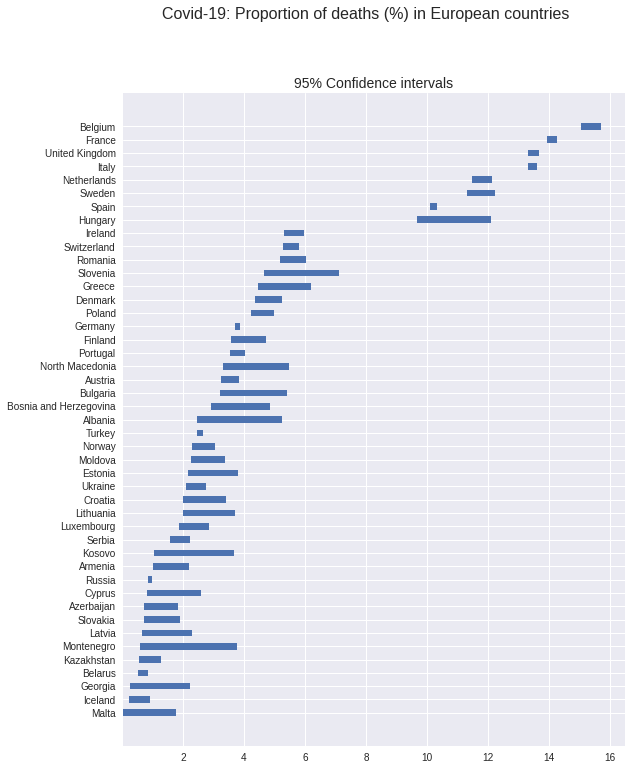

In [0]:
# Plot Confidence intervals for European countries

plt.style.use('seaborn')
plt.figure(figsize=(9, 12))
plt.barh(data_Europe['Country'], height=0.5, width=data_Europe['f_max']-data_Europe['f_min'], left=data_Europe['f_min'])
plt.suptitle('Covid-19: Proportion of deaths (%) in European countries', fontsize=16)
plt.title('95% Confidence intervals', fontsize=14)
plt.show()

In [0]:
# Check
data_EU

,Country,Deaths,Confirmed,Recovered,Europe,EU,f,f_min,f_max
106,Malta,4,448,282,Yes,Yes,0.892857,0.021772,1.763942
94,Latvia,12,812,267,Yes,Yes,1.477833,0.647872,2.307793
147,Slovakia,18,1379,394,Yes,Yes,1.305294,0.706227,1.904360
43,Cyprus,14,817,148,Yes,Yes,1.713586,0.823679,2.603494
99,Luxembourg,88,3723,3104,Yes,Yes,2.363685,1.875696,2.851674
98,Lithuania,41,1438,467,Yes,Yes,2.851182,1.990965,3.711399
41,Croatia,55,2030,1103,Yes,Yes,2.709360,2.003080,3.415640
55,Estonia,49,1643,233,Yes,Yes,2.982349,2.159838,3.804861
24,Bulgaria,56,1300,205,Yes,Yes,4.307692,3.204007,5.411378
8,Austria,543,15307,12337,Yes,Yes,3.547397,3.254359,3.840434


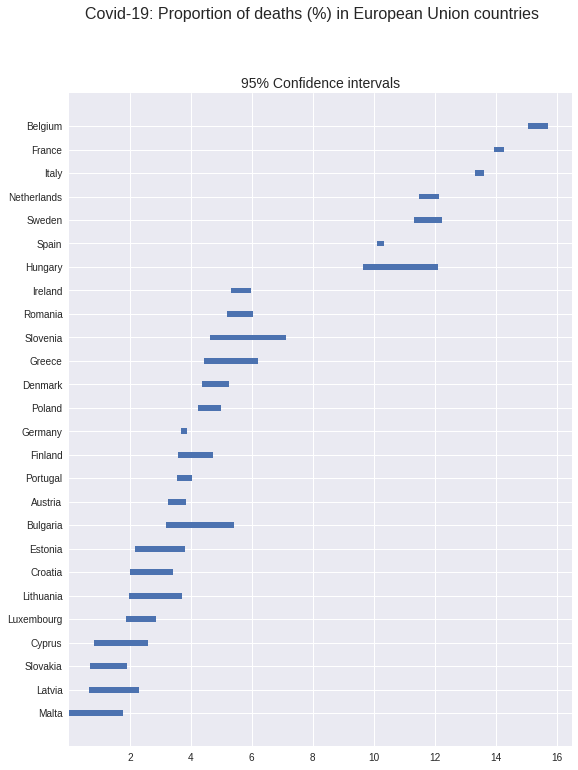

In [0]:
# Plot Confidence intervals for European UNION countries

plt.style.use('seaborn')
plt.figure(figsize=(9, 12))
plt.barh(data_EU['Country'], height=0.25, width=data_EU['f_max']-data_EU['f_min'], left=data_EU['f_min'])
plt.suptitle('Covid-19: Proportion of deaths (%) in European Union countries', fontsize=16)
plt.title('95% Confidence intervals', fontsize=14)
plt.show()

Sur les deux graphes, on remarque une séparation en deux groupes des intervalles de confiance. Une première partie regroupant la majorité des pays en bas à gauche, et une seconde partie regroupant 8 pays en haut à droite.

Ces graphes montrent que les deux groupes de pays sont statistiquement différents. Les intervalles de confiance tracés encadrent l'échantillon qui a été testé puisque seulement une partie de la population a été testée, et cela ne représente pas l'ensemble du territoire d'un pays. Il est donc important d'estimer les mesures prises pour inclure une marge d'erreur.

Dans les deux graphes ci-dessus, la proportion de décès est donc plus ou moins variable en fonction du nombre de cas testé positivement au virus.
Un intervalle de confiance est d'autant plus petit que la taille de l'échantillon testée est grand, et pour une même taille de population testée entre plusieurs pays, lintervalle sera d'autant plus grand si la fréquence est proche de 1/2.

# **Deuxième Partie : Détermination des personnes les plus à risques**

> ### *2.1 Import des différentes librairies nécessaires pour le projet et importations des données utiles pour la deuxième parti*e.

In [0]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import io
import os
from google.colab import files
from google.colab import drive
from collections import OrderedDict
from pylab import rcParams
import statsmodels.api as sm 

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path_dossier_fichier_antecedent_maladie = "/content/drive/My Drive/Colab Notebooks/Madame Lieva/Projet Covid-19/Fichier_utile_pour_code/Fichier_analyse_maladie_anterieures" # chemin du dossier dans lequel il y a les fichiers que nous utilisons pour les antécedants maladif

# Stocke tous les noms de fichiers dans une liste
path_files_name = os.listdir(path_dossier_fichier_antecedent_maladie)

# Initialise une dataframe
df_total = pd.DataFrame()

for i in range(len(path_files_name)):
  path_files_name[i] = path_dossier_fichier_antecedent_maladie + "/" + path_files_name[i] # pour chaque fichier, remplace le nom du fichier par son chemin
  df_total = pd.concat([df_total, pd.read_csv(path_files_name[i])]) # concatène df_total avec la dataframe contenant les données du fichier i.

# Affiche les 5 dernières lignes
df_total.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,10

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary,wuhan(0)_not_wuhan(1),Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
436543,007-99995,NaN,NaN,Milano,Lombardia,Italy,45.4659,9.12107,admin2,NaN,NaN,30.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://raw.githubusercontent.com/pcm-dpc/COVI...,NaN,NaN,NaN,NaN,NaN,NaN,Milano,Lombardia,Italy,52,TR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436544,007-99996,NaN,NaN,Milano,Lombardia,Italy,45.4659,9.12107,admin2,NaN,NaN,30.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://raw.githubusercontent.com/pcm-dpc/COVI...,NaN,NaN,NaN,NaN,NaN,NaN,Milano,Lombardia,Italy,52,TR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436545,007-99997,NaN,NaN,Milano,Lombardia,Italy,45.4659,9.12107,admin2,NaN,NaN,30.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://raw.githubusercontent.com/pcm-dpc/COVI...,NaN,NaN,NaN,NaN,NaN,NaN,Milano,Lombardia,Italy,52,TR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436546,007-99998,NaN,NaN,Milano,Lombardia,Italy,45.4659,9.12107,admin2,NaN,NaN,30.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://raw.githubusercontent.com/pcm-dpc/COVI...,NaN,NaN,NaN,NaN,NaN,NaN,Milano,Lombardia,Italy,52,TR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436547,007-99999,NaN,NaN,Milano,Lombardia,Italy,45.4659,9.12107,admin2,NaN,NaN,30.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,https://raw.githubusercontent.com/pcm-dpc/COVI...,NaN,NaN,NaN,NaN,NaN,NaN,Milano,Lombardia,Italy,52,TR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> ### *2.2 Vérification du contenu de la dataframe et tri de celle-ci.*


>> #### En affichant les résultats suivant, nous voyons clairement que nous ne pouvons pas supprimer toute ligne auquelle il manque une valeur, puisqu'il ne nous resterait quasiment plus de donnée et l'échantillon restant ne serai tpas représentatif.
>> #### De plus, d'après le contenu de la dataframe, certaines colonnes n'ont quasiment aucune donnée et ne nous intéressent pas pour la suite de notre étude.

In [0]:
print("La taille de la dataframe sans les lignes où toutes les valeurs sont NaN est : {} \n Cela représente {} % de la dataframe d'origine \n".format(len(df_total.dropna(how="all").index), len(df_total.dropna(how="all").index)/len(df_total.index)))
print("La taille de la dataframe sans les lignes qui ont au moins une valeurs égale à NaN est : {} \n Cela représente {} % de la dataframe d'origine \n".format(len(df_total.dropna(how="any").index), len(df_total.dropna(how="any").index)/len(df_total.index)))

La taille de la dataframe sans les lignes où toutes les valeurs sont NaN est : 5886784 
 Cela représente 0.9999998301279901 % de la dataframe d'origine 

La taille de la dataframe sans les lignes qui ont au moins une valeurs égale à NaN est : 0 
 Cela représente 0.0 % de la dataframe d'origine 



In [0]:
# Affiche les informations relatives à la dataframe df_total
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886785 entries, 0 to 436547
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  object 
 7   longitude                 object 
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    object 
 19  chronic_disease           object 
 20  source                   

#### Premièrement, toutes les lignes comportants des doublons dans la dataframe ont été supprimées.

In [0]:
# Enlève les doublons de la dataframe df_total et met cette nouvelle dataframe sans doublons dans la variable df_tot_sans_doublons
df_tot_sans_doublons = df_total.drop_duplicates()

df_tot_sans_doublons.info()
#df_tot_sans_doublons.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056046 entries, 0 to 171767
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1054952 non-null  object 
 1   age                       53846 non-null    object 
 2   sex                       54236 non-null    object 
 3   city                      588415 non-null   object 
 4   province                  993306 non-null   object 
 5   country                   1055784 non-null  object 
 6   latitude                  971669 non-null   object 
 7   longitude                 971669 non-null   object 
 8   geo_resolution            971669 non-null   object 
 9   date_onset_symptoms       16917 non-null    object 
 10  date_admission_hospital   6123 non-null     object 
 11  date_confirmation         1048081 non-null  object 
 12  symptoms                  7924 non-null     object 
 13  lives_in_Wuhan            20

#### Après avoir supprimé les doublons, nous récupérons les patients pour lesquels nous avons un âge et un sexe. Nous supprimons ensuite toutes les colonnes vides et gardons uniquement les patients dont nous avons l'état affiché.

In [0]:
print("Taille du dataframe sans les lignes ou il n'y a pas d'age {} \npar rapport au df de base {}".format(len(df_tot_sans_doublons["age"].dropna().index), len(df_tot_sans_doublons["age"].dropna(how="all").index)/len(df_tot_sans_doublons["age"].index)))
print("Taille du dataframe sans les lignes ou il n'y a pas de sex {} \npar rapport au df de base {}".format(len(df_tot_sans_doublons["sex"].dropna().index), len(df_tot_sans_doublons["sex"].dropna().index)/len(df_tot_sans_doublons["sex"].index)))

# Récupère seulement les lignes de df_tot_sans_doublons où la valeur du sexe n'est pas NaN
df_tot_avec_sex = df_tot_sans_doublons[pd.notna(df_tot_sans_doublons["sex"])]
# Récupère seulement les lignes de df_tot_sans_doublons où la valeur de l'âge n'est pas NaN
df_tot_avec_age_et_sex = df_tot_avec_sex[pd.notna(df_tot_avec_sex["age"])]

# Supprime toutes les colonnes vides de la dataframe df_tot_avec_age_et_sex
df_tot_avec_age_et_sex = df_tot_avec_age_et_sex.dropna(how="all", axis=1)
df_tot_avec_age_et_sex = df_tot_avec_age_et_sex.drop(['wuhan(0)_not_wuhan(1)', 'data_moderator_initials', 'travel_history_dates', 'travel_history_location', 'travel_history_binary', 'country_new', 'notes_for_discussion', 'latitude', 'longitude', 'geo_resolution', 'ID', 'admin1', 'admin2', 'admin3', 'lives_in_Wuhan', 'admin_id', 'location', 'source', 'sequence_available', 'city', 'province', 'country', 'reported_market_exposure'], axis=1)

# Ceux qui ont des maladies chroniques sont gardés
df_maladie_chronique = df_tot_avec_age_et_sex[(pd.isna(df_tot_avec_age_et_sex["chronic_disease"]) == False)]
# Ceux qui ont des maladies chroniques sont gardés ET pour lesquels nous avons leur état sont affichés
df_maladie_chronique = df_maladie_chronique[(pd.isna(df_maladie_chronique["outcome"]) == False)]

df_maladie_chronique.info()

Taille du dataframe sans les lignes ou il n'y a pas d'age 53846 
par rapport au df de base 0.05098830922137861
Taille du dataframe sans les lignes ou il n'y a pas de sex 54236 
par rapport au df de base 0.05135761131617373
<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1607 to 152261
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      351 non-null    object
 1   sex                      351 non-null    object
 2   date_onset_symptoms      134 non-null    object
 3   date_admission_hospital  102 non-null    object
 4   date_confirmation        313 non-null    object
 5   symptoms                 292 non-null    object
 6   additional_information   345 non-null    object
 7   chronic_disease_binary   351 non-null    object
 8   chronic_disease          351 non-null    object
 9   outcome                  351 non-null    object
 10  date_death_or_discharge  

#### Cependant, nous voyons qu'il ne nous reste que 351 patients, ce qui est très peu pour une bonne analyse, et n'est pas représentatif.
#### De plus, pour notre analyse il sera pertinent de comparer le nombre de personnes infectées ayant des maladies chroniques et ceux n'en ayant pas. Il ne faut donc pas enlever tous ceux qui n'ont pas de maladies chroniques renseignées. Nous allons donc supprimer les patients pour lesquels nous n'avons pas leur état. Nous reprenons donc la dataframe df_tot_avec_age_et_sex pour effectuer de nouveau un tri.


In [0]:
df_maladie_chronique = df_tot_avec_age_et_sex[pd.notna(df_tot_avec_age_et_sex["outcome"])] 
print(df_maladie_chronique.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 761 to 153041
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      2043 non-null   object
 1   sex                      2043 non-null   object
 2   date_onset_symptoms      943 non-null    object
 3   date_admission_hospital  871 non-null    object
 4   date_confirmation        1916 non-null   object
 5   symptoms                 648 non-null    object
 6   additional_information   1493 non-null   object
 7   chronic_disease_binary   920 non-null    object
 8   chronic_disease          351 non-null    object
 9   outcome                  2043 non-null   object
 10  date_death_or_discharge  1400 non-null   object
dtypes: object(11)
memory usage: 191.5+ KB
None


#### Etant donné que le nombre de données en prennant en compte l'âge, le sexe et l'état du patient est trop insuffisant, nous observerons uniquement les données où nous avons l'état du patient affiché.
#### Pour ce faire, nous reprenons la dataframe df_tot_sans_doublons, nous supprimons les colonnes qui ne nous intéressent pas et nous enlevons tous les patients pour lesquels nous n'avons pas d'état.

In [0]:
df_maladie_chronique_2 = df_tot_sans_doublons.drop(['ID', 'wuhan(0)_not_wuhan(1)', 'data_moderator_initials', 'travel_history_dates', 'travel_history_location', 'travel_history_binary', 'country_new', 'notes_for_discussion', 'latitude', 'longitude', 'geo_resolution', 'admin1', 'admin2', 'admin3', 'lives_in_Wuhan', 'admin_id', 'location', 'source', 'sequence_available', 'city', 'province', 'country', 'reported_market_exposure'], axis=1)

# Ceux qui ont des maladies chroniques
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["chronic_disease"]) == False)]

# Ceux qui ont des maladies chroniques ET ceux pour lesquels nous avons leur état
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["outcome"]) == False)]

# Cependant, pour le début de notre analyse nous voulons comparer le nombre de personnes infectées ayant des maladies chroniques et ceux n'en ayant pas
# Il ne faut donc pas enlever ceux qui n'ont pas de maladies chroniques

df_maladie_chronique_2 = df_maladie_chronique_2[pd.notna(df_maladie_chronique_2["outcome"])]
df_maladie_chronique_2 = df_maladie_chronique_2.dropna(how="all", axis=1)

df_maladie_chronique_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4714 entries, 21 to 153041
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      3475 non-null   object
 1   sex                      2091 non-null   object
 2   date_onset_symptoms      955 non-null    object
 3   date_admission_hospital  931 non-null    object
 4   date_confirmation        3491 non-null   object
 5   symptoms                 2187 non-null   object
 6   additional_information   1570 non-null   object
 7   chronic_disease_binary   2801 non-null   object
 8   chronic_disease          360 non-null    object
 9   outcome                  4714 non-null   object
 10  date_death_or_discharge  1522 non-null   object
dtypes: object(11)
memory usage: 441.9+ KB


#### Comme .info() nous le montre, nous avons plus que doublé le nombre de données. C'est le meilleur résultat pour le tri de données que nous avons. Nous utiliserons donc par la suite la dataframe df_maladie_chtonique_2
#### Nous regardons maintenant les différents états des patients et le nombre de patients par états pour avoir une première idée des données et mieux savoir les analyses à faire par la suite.

p : regression linéaire classique

d : ramène le modèle à un modele statique

q : calcul l'erreur 

In [0]:
df_maladie_chronique_2["outcome"].value_counts()

Under treatment                                                                                                              625
stable                                                                                                                       534
discharge                                                                                                                    516
Receiving Treatment                                                                                                          434
died                                                                                                                         431
                                                                                                                            ... 
https://twitter.com/ArogyaAndhra/status/1245672975895916544                                                                    1
https://www.thehindu.com/news/national/other-states/covid-19-8-more-test-positive-in-jk-one-in-la

#### Etant donnée qu'il y a des valeurs illogiques d'états et d'autres qui sont similaires, nous créons des dictionnaires avec comme clé chaque valeur que l'on veut changer et comme valeur, la valeur qu'on veut mettre à la place. Nous faisons des hypothèses (par exemple nous considérons les personnes en état critique comme mortes).
#### Cela est fait grâce à la méthode .replace()

In [0]:
remplace_dead = {
    "Death" : "Dead",
    "Deceased" : "Dead",
    "Died" : "Dead",
    "dead" : "Dead",
    "death" : "Dead",
    "deceased" : "Dead",
    "died" : "Dead",
    "Critical condition" : "Dead",
    "critical condition" : "Dead",
    "critical condition, intubated as of 14.02.2020" : "Dead",
    "unstable" : "Dead",
    "treated in an intensive care unit (14.02.2020)": "Dead",
    "severe illness": "Dead",
    "severe": "Dead"
}

remplace_stable = {
    "stable" : "Stable",
    "stable condition" : "Stable",
    "not hospitalized" : "Stable",
}

remplace_recovered = {
    "Alive" : "Recovered",
    "Discharged" : "Recovered",
    "Discharged from hospital" : "Recovered",
    "Recovered" : "Recovered",
    "recovered" : "Recovered",
    "recovering at home 03.03.2020" : "Recovered",
    "discharged" : "Recovered",
    "discharge" : "Recovered",
    "released from quarantine" : "Recovered",
}

remplace_treatment = {
    "Receiving Treatment" : "Treatment",
    "Under treatment" : "Treatment"
}

df_maladie_chronique_2["outcome"] = df_maladie_chronique_2["outcome"].replace(remplace_dead)
df_maladie_chronique_2["outcome"].replace(remplace_stable, inplace=True)

In [0]:
# Nous vérifions que les actions effectuées ont correctement été réalisé
df_maladie_chronique_2["outcome"].value_counts()

Stable                                                                                                                       732
Dead                                                                                                                         694
Under treatment                                                                                                              625
discharge                                                                                                                    516
Receiving Treatment                                                                                                          434
                                                                                                                            ... 
https://www.livemint.com/news/india/kerala-reports-14-new-corona-cases-state-tally-at-105-11585058837568.html                  1
https://twitter.com/ArogyaAndhra/status/1245672975895916544                                      

#### Nous groupons ensuite par maladie chronique pour avoir le nombre de patient malade du Covid-19 pour chaque maladie chronique.

In [0]:
df_maladie_chronique_2["chronic_disease"] = df_maladie_chronique_2["chronic_disease"].astype("category")

group_maladie = df_maladie_chronique_2.groupby(["chronic_disease"])
for etat in group_maladie:
  print(etat)

group_maladie.size()

('"thought to have had other pre-existing conditions"',       age   sex  ... outcome date_death_or_discharge
38227  44  male  ...    Dead              01.02.2020
85796  44  male  ...    Dead              01.02.2020
14398  44  male  ...    Dead              01.02.2020
86914  44  male  ...    Dead              01.02.2020
38228  44  male  ...    Dead              01.02.2020
82878  44  male  ...    Dead              01.02.2020
38166  44  male  ...    Dead              01.02.2020

[7 rows x 11 columns])
('COPD',       age     sex  ...     outcome date_death_or_discharge
38547  94  female  ...  discharged              14.02.2020
86079  94  female  ...  discharged              14.02.2020
5774   94  female  ...  discharged              14.02.2020
87197  94  female  ...  discharged              14.02.2020
38548  94  female  ...  discharged              14.02.2020
83161  94  female  ...  discharged              14.02.2020
38486  94  female  ...  discharged              14.02.2020

[7 rows x 11 c

chronic_disease
"thought to have had other pre-existing conditions"      7
COPD                                                     7
Chronic kidney disease:hypertension                      3
Chronic pulmonary condition                              3
Diabetes                                                 3
                                                        ..
hypertensive                                             9
hyperthyroidism                                          3
pre-renal azotemia:diabetes:hypertension                 3
prostate cancer:chronic obstructive pulmonary disease    3
prostate hypertrophy                                     7
Length: 65, dtype: int64

#### Cependant, en affichant les résultats du groupby, nous remarquons qu'il y a des séries exactement identiques qui se forment. Nous ne pouvons pas faire un drop_duplicate sur cette dataframe car nous avons enlevé trop d'informations comme par exemple la ville. En effet, deux femmes peuvent avoir le même âge et être entrées en même temps à l'hopital mais dans deux villes différentes.

#### Nous avons donc réanalysé les premières dataframe et nous avons remarqué que certain patient ont le même ID mais que certaines informations ne sont pas notées pareil. Comme par exemple la colonne "chronic_disease_binary" où les données peuvent etre écris False ou 0 alors que le sens est le même. 

#### Nous reprenons donc la dataframe sans doublons en gardant cette fois-ci les colonnes 'city' et 'country' en plus des autres. Nous enregistrons le résultat dans la dataframe df_maladie_chronique_2.
#### Nous enlevons ensuite les lignes qui ne nous intéressent pas (celles pour lesquelles nous ne connaissons pas l'état du patient) et refaisons un tri des doublons plus précis : tout d'abord uniquement sur la colonne 'ID' puis sur le reste de la dataframe sans la colonne 'ID'.

#### Pour ne pas trop utilisé de RAM, nous modifions directement l'ancienne dataframe df_maladie_chronique_2

In [0]:
# On enlève 'country' et 'city'
df_maladie_chronique_2 = df_tot_sans_doublons.drop(['chronic_disease_binary', 'wuhan(0)_not_wuhan(1)', 'data_moderator_initials', 'travel_history_dates', 'travel_history_location', 'travel_history_binary', 'country_new', 'notes_for_discussion', 'latitude', 'longitude', 'geo_resolution', 'admin1', 'admin2', 'admin3', 'lives_in_Wuhan', 'admin_id', 'location', 'source', 'sequence_available', 'province', 'reported_market_exposure'], axis=1)

# Ceux qui ont des maladies chroniques
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["chronic_disease"]) == False)]
# Ceux qui ont des maladies chroniques ET pour lesquels nous avons leur état
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["outcome"]) == False)]

# Cependant, pour le début de notre analyse nous voulons comparer le nombre de personnes infectées ayant des maladies chroniques et ceux n'en ayant pas
# Il ne faut donc pas enlever ceux qui n'ont pas de maladies chroniques

df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["outcome"]) == False)]

df_maladie_chronique_2 = df_maladie_chronique_2.drop_duplicates('ID') # 
df_maladie_chronique_2 = df_maladie_chronique_2.drop(['ID'], axis=1)
df_maladie_chronique_2 = df_maladie_chronique_2.drop_duplicates()

df_maladie_chronique_2 = df_maladie_chronique_2.dropna(how="all", axis=1)

df_maladie_chronique_2.info()

remplace_dead = {
    "Death" : "Dead",
    "Deceased" : "Dead",
    "Died" : "Dead",
    "dead" : "Dead",
    "death" : "Dead",
    "deceased" : "Dead",
    "died" : "Dead",
    "Critical condition" : "Dead",
    "critical condition" : "Dead",
    "critical condition, intubated as of 14.02.2020" : "Dead",
    "unstable" : "Dead",
    "treated in an intensive care unit (14.02.2020)": "Dead",
    "severe illness": "Dead",
    "severe": "Dead"
}

remplace_stable = {
    "stable" : "Stable",
    "stable condition" : "Stable",
    "not hospitalized" : "Stable",
}

remplace_recovered = {
    "Alive" : "Recovered",
    "Discharged" : "Recovered",
    "Discharged from hospital" : "Recovered",
    "Recovered" : "Recovered",
    "recovered" : "Recovered",
    "recovering at home 03.03.2020" : "Recovered",
    "discharged" : "Recovered",
    "discharge" : "Recovered",
    "released from quarantine" : "Recovered",
}

remplace_treatment = {
    "Receiving Treatment" : "Treatment",
    "Under treatment" : "Treatment",
    "Symptoms only improved with cough. Currently hospitalized for follow-up." : "Treatment"
}

df_maladie_chronique_2["outcome"].replace(remplace_dead, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_stable, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_recovered, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_treatment, inplace=True)


liste_etat = []

for etat_patient in df_maladie_chronique_2["outcome"] :
  nouveau_etat = etat_patient
  if ("http" in etat_patient) or ("gov" in etat_patient) or (etat_patient == "State Bulletin"):
    nouveau_etat = "nan"
  liste_etat.append(nouveau_etat)

df_maladie_chronique_2['outcome'] = liste_etat
df_maladie_chronique_2 = df_maladie_chronique_2[(df_maladie_chronique_2["outcome"] == "nan") == False]

  #else:
    #df_maladie_chronique_2.replace(row["outcome"], np.nan, inplace=True)


df_maladie_chronique_2["chronic_disease"] = df_maladie_chronique_2["chronic_disease"].astype("category")
group_maladie = df_maladie_chronique_2.groupby(["chronic_disease"])
group_maladie.size()

for etat in group_maladie:
  print(etat)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 21 to 87419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1633 non-null   object
 1   sex                      520 non-null    object
 2   city                     539 non-null    object
 3   country                  1713 non-null   object
 4   date_onset_symptoms      202 non-null    object
 5   date_admission_hospital  179 non-null    object
 6   date_confirmation        567 non-null    object
 7   symptoms                 1289 non-null   object
 8   additional_information   377 non-null    object
 9   chronic_disease          116 non-null    object
 10  outcome                  1715 non-null   object
 11  date_death_or_discharge  360 non-null    object
dtypes: object(12)
memory usage: 174.2+ KB
('"thought to have had other pre-existing conditions"',       age   sex  ... outcome date_death_or_dischar

#### Après avoir de nouveau observé les nouvelles valeurs de la dernière dataframe, nous pouvons voir qu'il y a encore quelques doublons (pour les personnes n'ayant pas de maladies chroniques)(602 sans doublons et 619 avec au total) et en groupant par ville et date de sortie, nous voyons bien que des données sont effectivement en double. Nous supprimons donc les doublons restants.

In [0]:
print(df_maladie_chronique_2["outcome"].count())
print(df_maladie_chronique_2.drop_duplicates()['outcome'].count())
group_ville_date_outcome = df_maladie_chronique_2.groupby(['city', 'date_death_or_discharge'])
for i in group_ville_date_outcome:
  print(i)

df_maladie_chronique_2 = df_maladie_chronique_2.drop_duplicates()

619
602
(('Addis Ababa', '05.04.2020'),       age   sex         city  ... chronic_disease outcome date_death_or_discharge
69302  56  male  Addis Ababa  ...             NaN    Dead              05.04.2020

[1 rows x 12 columns])
(('Adelaide', '03.03.2020'),      age     sex      city  ... chronic_disease    outcome date_death_or_discharge
2473  24  female  Adelaide  ...             NaN  Recovered              03.03.2020

[1 rows x 12 columns])
(('Adelaide', '14.02.2020'),       age     sex      city  ... chronic_disease    outcome date_death_or_discharge
38233  60    male  Adelaide  ...             NaN  Recovered              14.02.2020
38234  60  female  Adelaide  ...             NaN  Recovered              14.02.2020

[2 rows x 12 columns])
(('Ang Mo Kio Avenue 3', '01.03.2020'),      age     sex  ...    outcome date_death_or_discharge
1567  51  female  ...  Recovered              01.03.2020

[1 rows x 12 columns])
(('Antipolo', '23.03.2020'),       age   sex      city  ... chronic_di

#### Nous n'avons plus que 602 patients ce qui n'est pas suffisant pour une analyse. Cependant, toutes ces valeurs sont correctement triées et l'analyse sera bien meilleur que si nous avions 4000 patients mais avec quelques doublons.

> ### *2.3 Analyse de l'influence des maladies chroniques sur l'état du patient.*


Nous récupérons pour cela les différentes maladies chroniques que les patients ont.

In [0]:
differente_maladie = set()
df_maladie_chronique_2["chronic_disease"] = df_maladie_chronique_2["chronic_disease"].astype(str)

for val in df_maladie_chronique_2["chronic_disease"] :
  if not val == "nan":
    tab_maladie = val.split(":")   

    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(",")
    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(";")
    for maladie in tab_maladie:
      maladie = maladie.lower().strip()
      differente_maladie.add(maladie)

list_maladie = [ i for i in differente_maladie]
list_maladie.sort()
list_maladie

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['"thought to have had other pre-existing conditions"',
 'and lung cancer',
 'asthma',
 'atherosclerosis',
 'atrial fibrillation',
 'benign prostatic hyperplasia',
 'benign prostatic hypertrophy',
 'bronchial asthma',
 'cardiac disease',
 'cardiac dysrhythmia',
 'cardiomyopathy',
 'cardiovascular disease',
 'cerebral infarction',
 'cerebrovascular accident infarct',
 'cerebrovascular infarct',
 'chronic bronchitis',
 'chronic kidney disease',
 'chronic obstructive pulmonary disease',
 'chronic pulmonary condition',
 'chronic renal insufficiency',
 'colon cancer',
 'colon cancer surgery four years ago',
 'copd',
 'coronary artery disease',
 'coronary artery stenting',
 'coronary heart disease',
 'coronary heart disease for which a stent had been implanted',
 'coronary stenting',
 'diabetes',
 'diabetes for more than 20 years',
 'dislipidemia',
 'dyslipidemia',
 'encephalomalacia',
 'frequent ventricular premature beat (fvpb)',
 'hemorrhage of digestive tract',
 'hepatitis b',
 'hip repl

#### En observant les données, nous pouvons voir que certaines maladies identiques sont notées de façon différentes comme par exemple, l'hypertension qui est noté hypertensive, history of hypertension ....

#### Nous devons donc renommer correctement les maladies pour pouvoir les utiliser efficacement par la suite. Grâce à la visualisation au dessus, nous voyons très bien les maladies qu'il faut renommer. Nous le faisons donc dans la cellule suivante :

In [0]:
serie_remplacante = []

for maladie_patient in df_maladie_chronique_2["chronic_disease"]:
  compteur = 0
  nouvelle_chaine_caractere_maladie = "nan"
  #print(maladie_patient == "nan")
  if not (maladie_patient == "nan") :
    #print(maladie_patient)
    tab_maladie = maladie_patient.split(":")
    #print(tab_maladie)

    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(",")

    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(";")

    for maladie in tab_maladie:
      maladie = maladie.lower().strip()
      #print("au debut c'est : " + maladie)
      if maladie == "and lung cancer" :
        maladie = "lung cancer"

      elif maladie == "bronchial asthma" :
        maladie = "asthma"

      elif maladie == "benign prostatic hyperplasia" :
        maladie = "prostate hyperplasia"

      elif maladie == "benign prostatic hypertrophy" :
        maladie = "prostate hypertrophy"
      
      elif maladie == "frequent ventricular premature beat (fvpb)" or maladie == "cardiomyopathy" or maladie == "atherosclerosis" or maladie == "cardiac dysrhythmia" or maladie == "frequent ventricular premature beat" or maladie == "coronary artery disease" or maladie == "coronary artery stenting" or maladie == "coronary heart disease" or maladie == "coronary heart disease for which a stent had been implanted" or maladie == "coronary stenting" or maladie == "ischemic heart disease" or maladie == "stenocardia" or maladie == "valvular heart disease" or maladie == "atrial fibrillation" or maladie == "cardiovascular disease":
        maladie = "cardiac disease"

      elif maladie == "cerebral infarction" or maladie == "cerebrovascular accident infarct" or maladie == "cerebrovascular infarct" or maladie == "cerebral vascular accident":
        maladie = "cerebral vascular accident"

      elif maladie == "chronic renal insufficiency" or maladie =="pre-renal azotemia" or maladie == "chronic kidney disease" :
        maladie = "renal disease"

      elif maladie == "chronic obstructive pulmonary disease" or maladie == "chronic pulmonary condition" or maladie == "chronic bronchitis" or maladie == "copd" :
        maladie = "chronic pulmonary disease"

      elif maladie == "colon cancer surgery four years ago" :
        maladie = "colon cancer"

      elif maladie == "dislipidemia" :
        maladie = "dyslipidemia"

      elif maladie == "hypertensive" or maladie == "hypertension for more than 20 years" or maladie == "history of hypertension" or maladie == "hypertenstion":
        maladie = "hypertension"

      elif maladie == "parkinson's disease for five years" or maladie == "taking medicine of madopar" :
        maladie = "parkinson's disease"

      elif maladie == "hypothyroidism" :
        maladie = "hyperthyroidism"

      elif maladie == "upper git bleeding" :
        maladie = "hemorrhage of digestive tract"
      
      elif "diabete" in maladie or maladie == "impaired fasting glucose" :
        maladie = "diabetes"
      
      elif maladie == '"thought to have had other pre-existing conditions"' :
        maladie = "nan"


      #print("au final c'est : " + maladie + "\n")
      if nouvelle_chaine_caractere_maladie == "nan" :
        nouvelle_chaine_caractere_maladie = maladie
      else:
        nouvelle_chaine_caractere_maladie = nouvelle_chaine_caractere_maladie + "," + maladie
    
      tab_maladie[compteur] = maladie
      compteur += 1

  serie_remplacante.append(nouvelle_chaine_caractere_maladie)

df_maladie_chronique_2["chronic_disease"] = serie_remplacante


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Nous vérifions que toutes les maladies ont correctement été réécrites :

In [0]:
differente_maladie = set()
df_maladie_chronique_2["chronic_disease"] = df_maladie_chronique_2["chronic_disease"].astype(str)

for val in df_maladie_chronique_2["chronic_disease"] :
  if not val == "nan":
    tab_maladie = val.split(":")   

    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(",")
    for i in range(len(tab_maladie)):
      tab_maladie[i:i+1] = tab_maladie[i].split(";")
    for maladie in tab_maladie:
      maladie = maladie.lower().strip()
      differente_maladie.add(maladie)

list_maladie = [ i for i in differente_maladie]
list_maladie.sort()
list_maladie

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['asthma',
 'cardiac disease',
 'cerebral vascular accident',
 'chronic pulmonary disease',
 'colon cancer',
 'diabetes',
 'dyslipidemia',
 'encephalomalacia',
 'hemorrhage of digestive tract',
 'hepatitis b',
 'hip replacement',
 'hiv positive',
 'hypertension',
 'hyperthyroidism',
 'lung cancer',
 "parkinson's disease",
 'prostate cancer',
 'prostate hyperplasia',
 'prostate hypertrophy',
 'renal disease',
 'tongue cancer',
 'tuberculosis']

#### Nous voulons savoir si les maladies chroniques ont un impact sur la sensibilité du patient à attraper le Covid-19.
#### Pour cela, nous traçons un diagramme montrant la proportion entre les personnes ayant attrapées le Covid-19 et qui ont des maladies chroniques, et celles qui n'en ont pas.

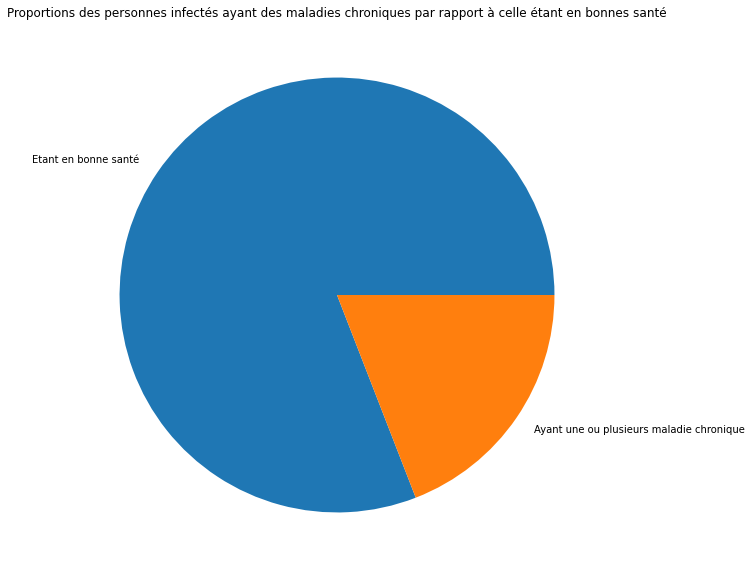

In [0]:
df_sans_maladie = df_maladie_chronique_2[df_maladie_chronique_2["chronic_disease"] == "nan"]
df_avec_maladie = df_maladie_chronique_2[df_maladie_chronique_2["chronic_disease"] != "nan"]
plt.pie((df_sans_maladie["outcome"].count(), df_avec_maladie["outcome"].count()), labels=["Etant en bonne santé", "Ayant une ou plusieurs maladies chroniques"])
plt.title("Proportions des personnes infectées ayant des maladies chroniques par rapport à celles en bonne santé")
plt.show()

Sur le graphique ci-dessus les maladies chroniques n'ont pas l'air d'impactées la sensibilité du patient à contracter le Covid-19.

Cependant, il est intéressant de voir comment ces maladies peuvent impacter la gravité du virus chez les patients infectés.

#### Nous groupons donc maintenant les personnes selon leurs états pour voir comment les maladies chroniques influent sur l'état du patient. 
### Nous ne pouvons pas grouper par maladie car chaque personne peut avoir plusieurs maladies et donc une personne qui a de l'hypertension et des problèmes cardiaques sera dans un groupe différent d'une personne qui a uniquement des problèmes d'hypertension.


In [0]:
groupe_etat = df_maladie_chronique_2.groupby(['outcome'])
print(groupe_etat["outcome"].count())

outcome
Dead         191
Recovered    225
Stable       137
Treatment     49
Name: outcome, dtype: int64


#### Nous analysons d'abord l'impact des maladies chroniques sur les patients décédés.
#### Nous récupèrons donc dans le groupby les personnes qui sont décédées puis nous traçons un diagramme comme celui réalisé précédemment.

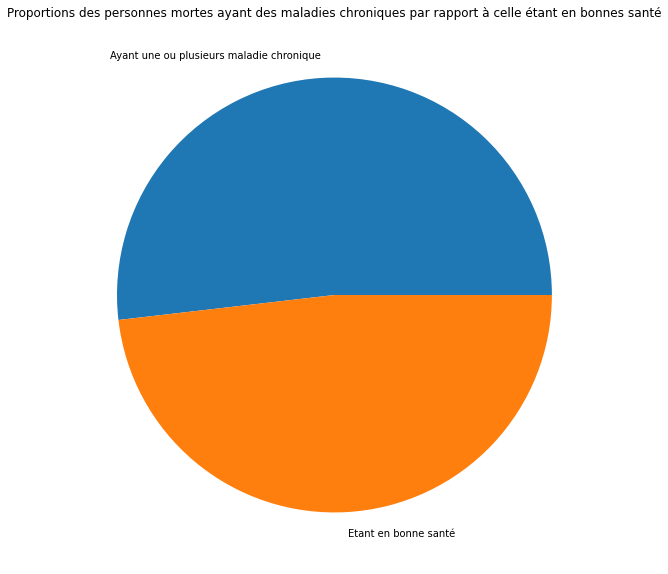

In [0]:
df_mort = groupe_etat.get_group("Dead")
nb_mort_avec_maladie = df_mort['chronic_disease'][(df_mort["chronic_disease"] == "nan") == False].count()
nb_mort_sans_maladie = df_mort['chronic_disease'][(df_mort['chronic_disease'] == "nan")].count()
nb_mort = {"Ayant une ou plusieurs maladies chroniques" : nb_mort_avec_maladie , "Etant en bonne santé" : nb_mort_sans_maladie}
plt.pie(nb_mort.values(), labels=nb_mort.keys())
plt.title("Proportions des personnes décédées ayant des maladies chroniques par rapport à celles étant en bonne santé")
plt.show()

D'après nos données et ce graphe, le nombre de morts ayant une maladie est légèrement supérieur à ceux qui sont en bonne santé.

Nous faisons maintenant la même chose pour les autres états.

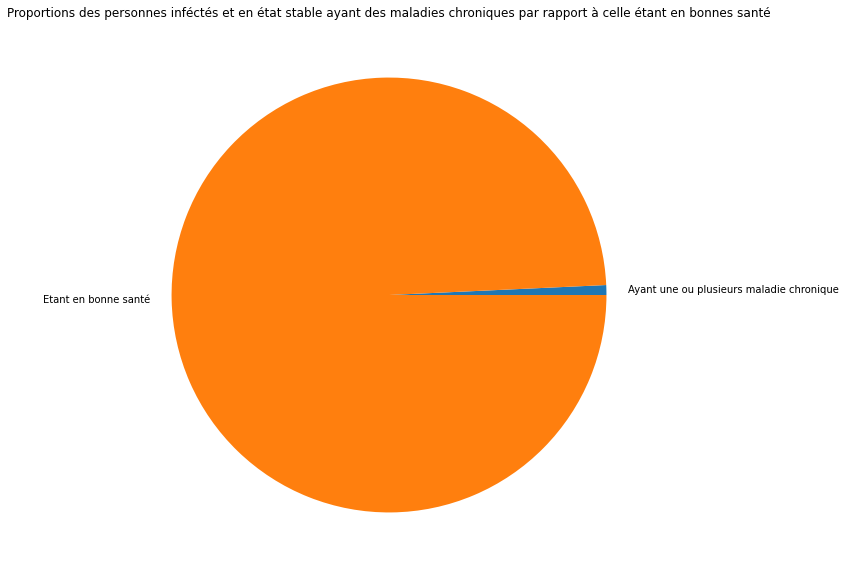

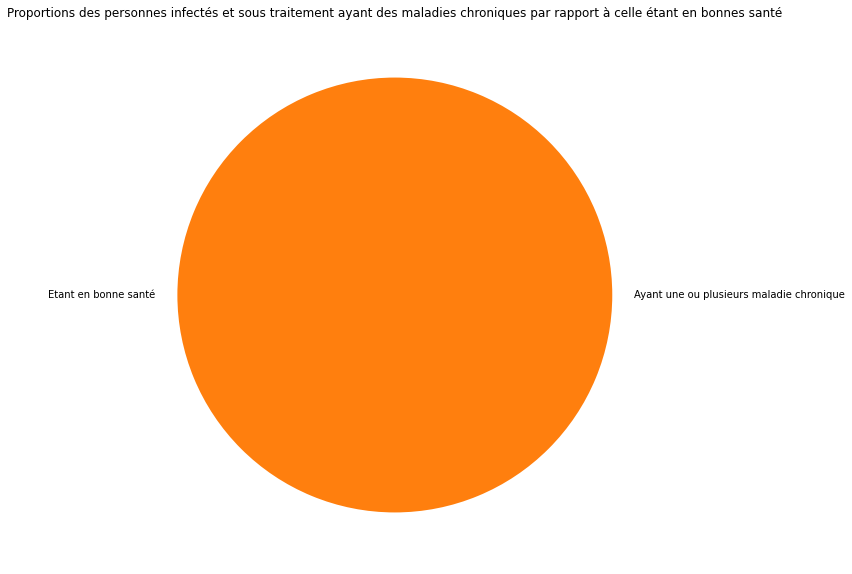

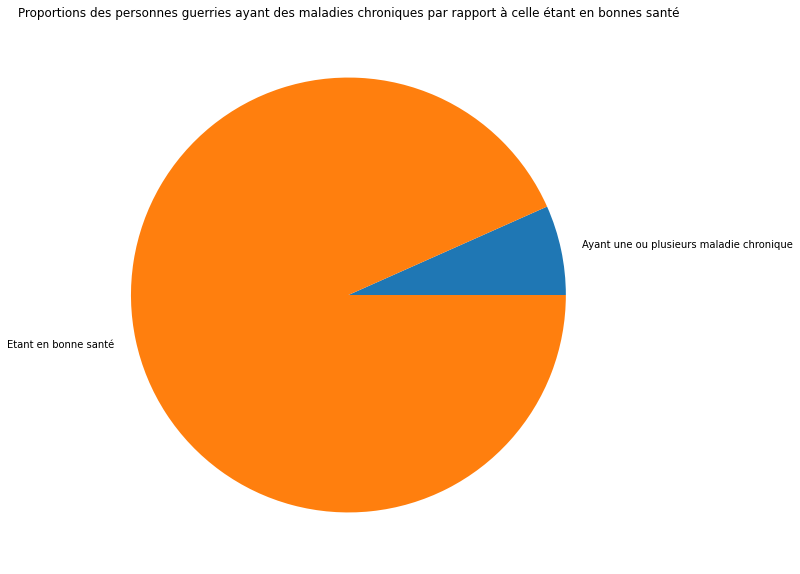

In [0]:
df_stable = groupe_etat.get_group("Stable")
nb_stable_avec_maladie = df_stable['chronic_disease'][(df_stable["chronic_disease"] == "nan") == False].count()
nb_stable_sans_maladie = df_stable['chronic_disease'][(df_stable['chronic_disease'] == "nan")].count()
nb_stable = {"Ayant une ou plusieurs maladies chroniques" : nb_stable_avec_maladie , "Etant en bonne santé" : nb_stable_sans_maladie}
plt.pie(nb_stable.values(), labels=nb_stable.keys())
plt.title("Proportions des personnes inféctées et en état stable ayant des maladies chroniques par rapport à celles étant en bonne santé")
plt.show()

df_treatment = groupe_etat.get_group("Treatment")
nb_treatment_avec_maladie = df_treatment['chronic_disease'][(df_treatment["chronic_disease"] == "nan") == False].count()
nb_treatment_sans_maladie = df_treatment['chronic_disease'][(df_treatment['chronic_disease'] == "nan")].count()
nb_treatment = {"Ayant une ou plusieurs maladies chroniques" : nb_treatment_avec_maladie , "Etant en bonne santé" : nb_treatment_sans_maladie}
plt.pie(nb_treatment.values(), labels=nb_treatment.keys())
plt.title("Proportions des personnes infectées et sous traitement ayant des maladies chroniques par rapport à celles étant en bonne santé")
plt.show()

df_recovered = groupe_etat.get_group("Recovered")
nb_recovered_avec_maladie = df_recovered['chronic_disease'][(df_recovered["chronic_disease"] == "nan") == False].count()
nb_recovered_sans_maladie = df_recovered['chronic_disease'][(df_recovered['chronic_disease'] == "nan")].count()
nb_recovered = {"Ayant une ou plusieurs maladies chroniques" : nb_recovered_avec_maladie , "Etant en bonne santé" : nb_recovered_sans_maladie}
plt.pie(nb_recovered.values(), labels=nb_recovered.keys())
plt.title("Proportions des personnes guéries ayant des maladies chroniques par rapport à celles étant en bonne santé")
plt.show()

En observant les 4 derniers graphes, il semble clairement apparaître que les personnes ayant le Covid-19 et des maladies chroniques ont plus de risques de décéder que les autres.

> #### Nous voulons donc maintenant observer les maladies chroniques les plus à risque avec le Covid-19.
#### Pour ce faire, nous regroupons toutes les différentes maladies chroniques des personnes décédées, nous comptons celles qui apparaissent le plus et nous traçons un histogramme pour correctement visualiser ces données.

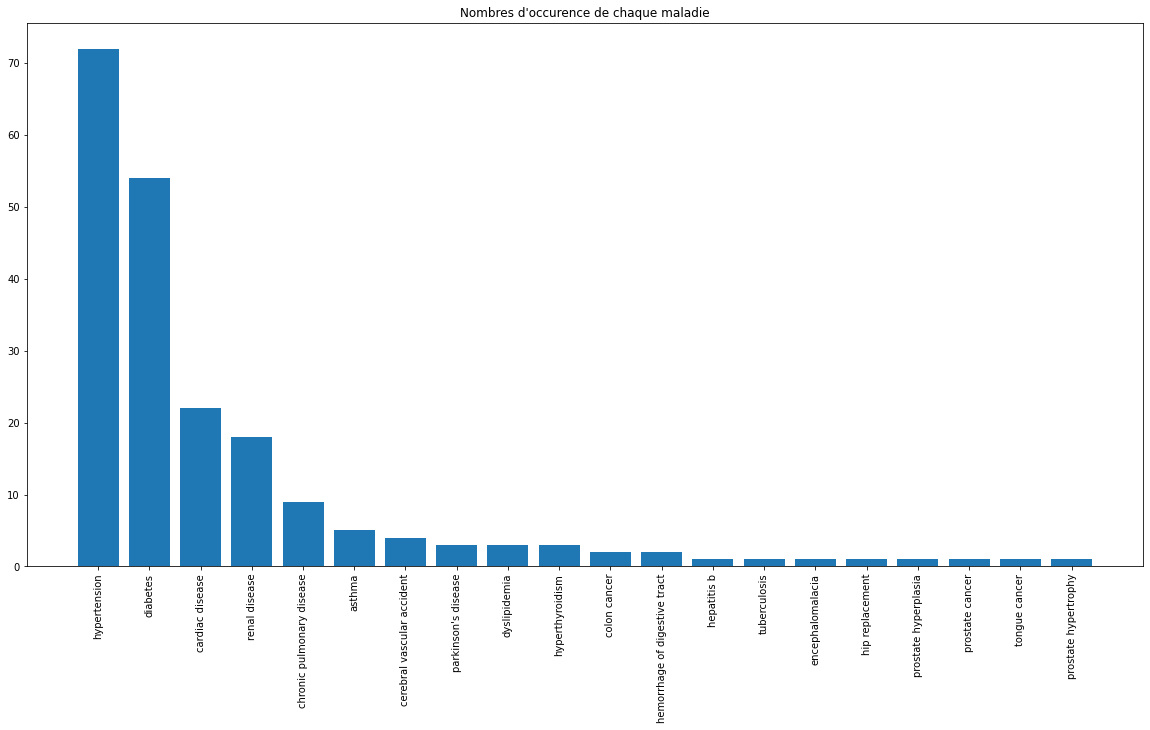

In [0]:
dico_maladi_mort = dict()
for malad_patient in df_mort["chronic_disease"] :
  if malad_patient != "nan" :
    for malad in malad_patient.split(","):
      if malad in dico_maladi_mort:
        dico_maladi_mort[malad] +=1
      else:
        dico_maladi_mort[malad] = 1
dico_maladi_mort = OrderedDict(sorted(dico_maladi_mort.items(), key=lambda t: t[1], reverse=True))

plt.bar(dico_maladi_mort.keys(), dico_maladi_mort.values())
plt.title("Nombre d'occurence de chaque maladie")
plt.xticks(rotation = 'vertical')
plt.show()

> ### *2.4 Analyse de l'impact de l'âge des patients sur la gravité du Covid-19.*

Nous allons récupérer les patients pour lesquels nous avons l'âge et refaire le même tri que précédement.

In [0]:
# On enlève 'country' et 'city'
df_maladie_chronique_2 = df_tot_sans_doublons.drop(['chronic_disease', 'chronic_disease_binary', 'wuhan(0)_not_wuhan(1)', 'data_moderator_initials', 'travel_history_dates', 'travel_history_location', 'travel_history_binary', 'country_new', 'notes_for_discussion', 'latitude', 'longitude', 'geo_resolution', 'admin1', 'admin2', 'admin3', 'lives_in_Wuhan', 'admin_id', 'location', 'source', 'sequence_available', 'province', 'reported_market_exposure'], axis=1)

# Ceux qui ont des maladies chroniques
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["chronic_disease"]) == False)]
# Ceux qui ont des maladies chroniques ET ceux pour lesquels nous avons leur état
#df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["outcome"]) == False)]

# Cependant, pour le début de notre analyse nous voulons comparer le nombre de personnes infectées ayant des maladies chroniques et ceux n'en ayant pas
# Il ne faut donc pas enlever ceux qui n'ont pas de maladies chroniques

df_maladie_chronique_2 = df_maladie_chronique_2[(pd.isna(df_maladie_chronique_2["age"]) == False)]

df_maladie_chronique_2 = df_maladie_chronique_2.drop_duplicates('ID') # 
df_maladie_chronique_2 = df_maladie_chronique_2.drop(['ID'], axis=1)
df_maladie_chronique_2 = df_maladie_chronique_2.drop_duplicates()

df_maladie_chronique_2 = df_maladie_chronique_2.dropna(how="all", axis=1)

df_maladie_chronique_2["outcome"].replace(remplace_dead, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_stable, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_recovered, inplace=True)
df_maladie_chronique_2["outcome"].replace(remplace_treatment, inplace=True)


liste_etat = []
df_maladie_chronique_2["outcome"] = df_maladie_chronique_2["outcome"].astype(str)
for etat_patient in df_maladie_chronique_2["outcome"] :
  nouveau_etat = etat_patient
  if ("http" in etat_patient) or ("gov" in etat_patient) or (etat_patient == "State Bulletin"):
    nouveau_etat = "nan"
  liste_etat.append(nouveau_etat)

df_maladie_chronique_2['outcome'] = liste_etat
df_maladie_chronique_2 = df_maladie_chronique_2[(df_maladie_chronique_2["outcome"] != "nan")]

  #else:
    #df_maladie_chronique_2.replace(row["outcome"], np.nan, inplace=True)


df_maladie_chronique_2["age"] = df_maladie_chronique_2["age"].astype("category")
group_age = df_maladie_chronique_2.groupby(["age"])
group_age.size()
df_maladie_chronique_2["age"] = df_maladie_chronique_2["age"].astype(str)
for age in group_age:
  print(age)

(15.0,          age   sex  ...    outcome date_death_or_discharge
137747  15.0  male  ...  Recovered                     NaN

[1 rows x 11 columns])
(16.0,          age     sex  ...    outcome date_death_or_discharge
137741  16.0    male  ...  Recovered                     NaN
137744  16.0  female  ...  Recovered                     NaN
137748  16.0  female  ...  Recovered                     NaN

[3 rows x 11 columns])
(20.0,          age   sex  ...    outcome date_death_or_discharge
132131  20.0  male  ...  Recovered                     NaN

[1 rows x 11 columns])
(38.0,          age     sex  ...    outcome date_death_or_discharge
132133  38.0  female  ...  Recovered                     NaN

[1 rows x 11 columns])
(44.0,          age   sex  ...    outcome date_death_or_discharge
137746  44.0  male  ...  Recovered                     NaN

[1 rows x 11 columns])
(47.0,          age   sex  ...    outcome date_death_or_discharge
132134  47.0  male  ...  Recovered                     NaN


Il ne semble pas y avoir de doublons. Nous pouvons donc directement exploiter ces valeurs. Cependant, pour correctement expoiter les données, nous allons regrouper les patients dans des tranches d'êge de 9 ans (par exemple de 10 à 19 ans). Pour certains patients cet intervalle d'âge existe déjà. Elle n'est cependant pas forcément de 9 ans.

Nous allons donc faire la moyenne de cet intervalle pour ensuite recréer correctement les intervalles d'âge.

In [0]:
list_age = []
for age in df_maladie_chronique_2["age"] :
  moy_age = age
  if "-" in age:
    age_split = age.split("-")
    try:
      age_0 = float(age_split[0])
    except:
      try:
        age_1 = float(age_split[1])
      except:
        moy_age = np.nan

    try:
      age_1 = float(age_split[1])
      moy_age = (age_0 + age_1)/2
    except:
      moy_age = age_0

  moy_2 = int(round(float(moy_age), -1))
  
  if moy_2 < float(moy_age) :
    moy_age = str(moy_2) + "-" + str(moy_2+9)
  else :
    moy_age = str(moy_2-10) + "-" + str(moy_2-1)

  list_age.append(moy_age)

df_maladie_chronique_2["age"] = list_age
group_age = df_maladie_chronique_2.groupby("age")

outcome
Dead         193
Recovered    200
Stable       126
Treatment     15
Name: outcome, dtype: int64


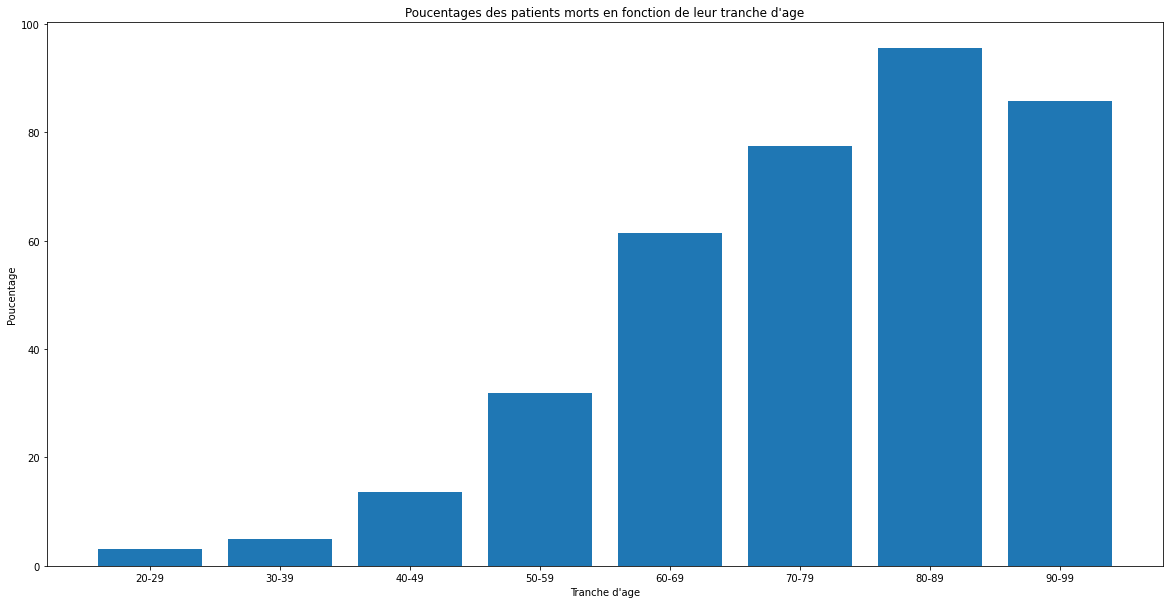

In [0]:
groupe_etat = df_maladie_chronique_2.groupby(['outcome'])
print(groupe_etat["outcome"].count())

df_mort = groupe_etat.get_group("Dead")
group_age_mort = df_mort.groupby(["age"])
list_pourc_age_mort = []

for tranch_age in group_age_mort["age"].count().keys():
  list_pourc_age_mort.append((float(group_age_mort["age"].get_group(tranch_age).count())*100)/float(group_age["age"].get_group(tranch_age).count()))

plt.bar(group_age_mort["age"].count().keys(), list_pourc_age_mort)
plt.xlabel("Tranche d'âge")
plt.ylabel('Poucentage')
plt.title("Poucentage des patients décédés en fonction de leur tranche d'âge")
plt.show()

En observant l'histogramme ci-dessus, il apparait clairement que les personnes agées ont un pourcentage de décès plus élevé. Il semble donc que les personnes agées ont plus de risques de mort face au Covid-19.

Nous allons vérifier cette hypothèse en regardant les autres états des patients.

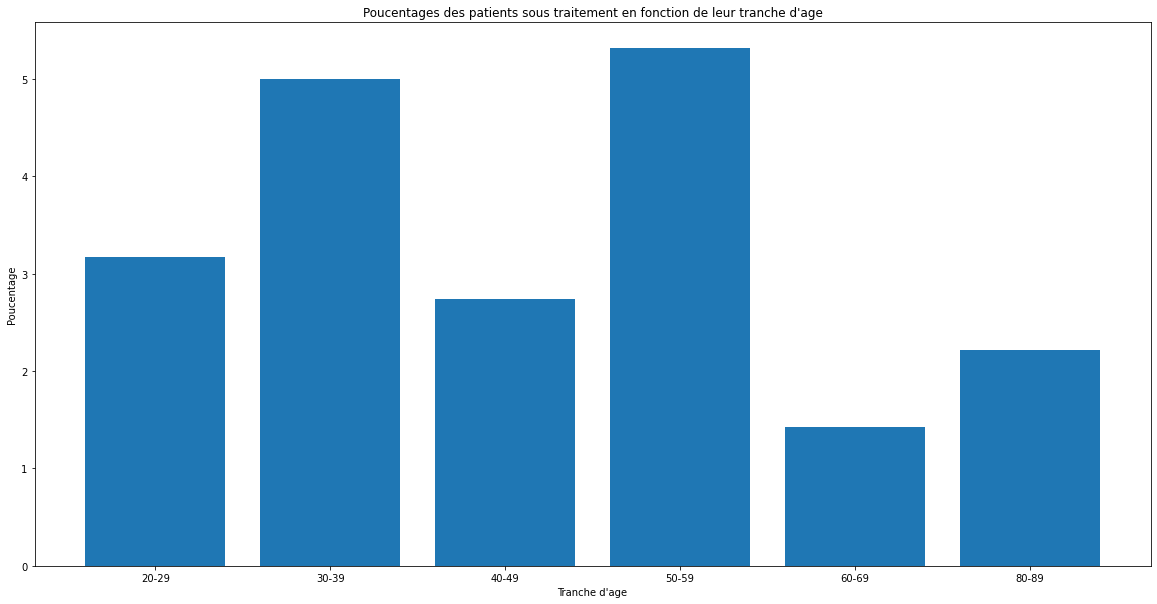

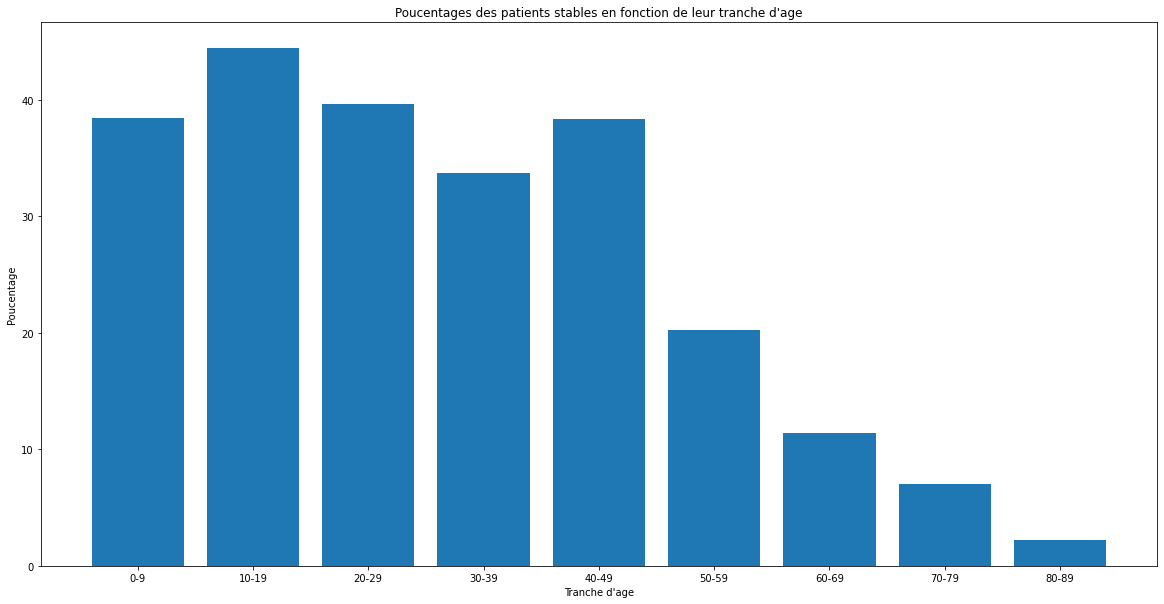

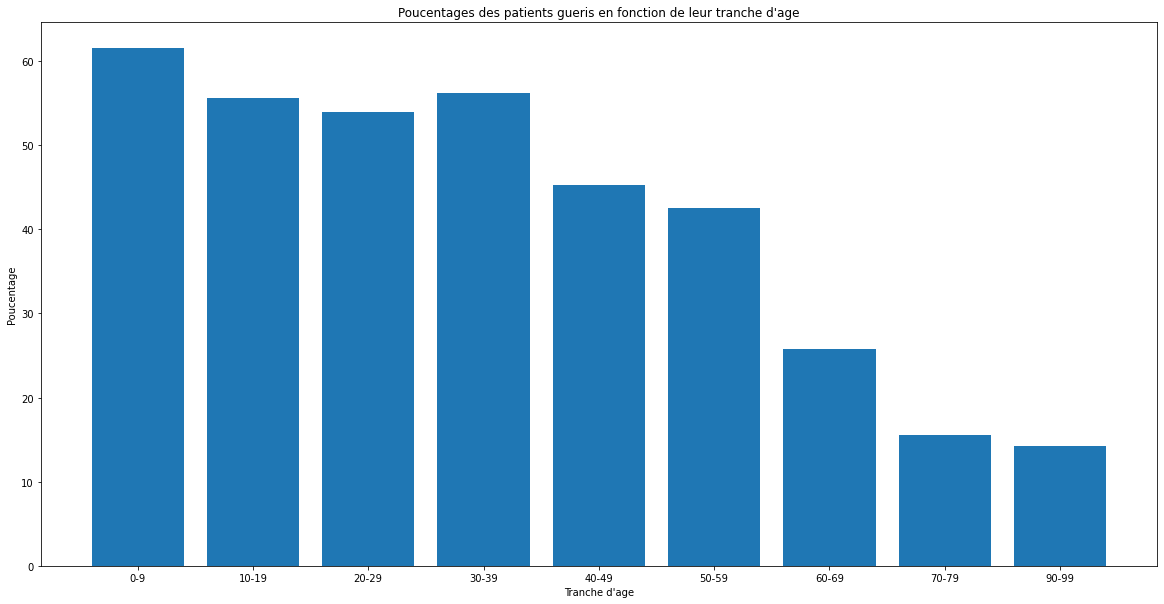

In [0]:
df_treatment = groupe_etat.get_group("Treatment")
group_age_treat = df_treatment.groupby(["age"])
list_pourc_age_treat = []
for tranch_age in group_age_treat["age"].count().keys():
  list_pourc_age_treat.append( ( float(group_age_treat["age"].get_group(tranch_age).count()) * 100 ) / float(group_age["age"].get_group(tranch_age).count()) )
plt.bar(group_age_treat["age"].count().keys(), list_pourc_age_treat)
plt.xlabel("Tranche d'age")
plt.ylabel('Poucentage')
plt.title("Poucentages des patients sous traitement en fonction de leur tranche d'age")
plt.show()

df_stable = groupe_etat.get_group("Stable")
group_age_stable = df_stable.groupby(["age"])
list_pourc_age_stable = []
for tranch_age in group_age_stable["age"].count().keys():
  list_pourc_age_stable.append( ( float(group_age_stable["age"].get_group(tranch_age).count()) * 100 ) / float(group_age["age"].get_group(tranch_age).count()) )
plt.bar(group_age_stable["age"].count().keys(), list_pourc_age_stable)
plt.xlabel("Tranche d'age")
plt.ylabel('Poucentage')
plt.title("Poucentages des patients stables en fonction de leur tranche d'age")
plt.show()

df_recov = groupe_etat.get_group("Recovered")
group_age_recov = df_recov.groupby(["age"])
list_pourc_age_recov = []
for tranch_age in group_age_recov["age"].count().keys():
  list_pourc_age_recov.append( ( float(group_age_recov["age"].get_group(tranch_age).count()) * 100 ) / float(group_age["age"].get_group(tranch_age).count()) )
plt.bar(group_age_recov["age"].count().keys(), list_pourc_age_recov)
plt.xlabel("Tranche d'âge")
plt.ylabel('Poucentage')
plt.title("Poucentage des patients guéris en fonction de leur tranche d'âge")
plt.show()

Nous voyons bien apparaitre que le pourcentage de patients guéris, stables et sous traitements dans la tranche d'âge des personnes agées est très faible. Il est donc possible de supposer que les personnes agées sont plus à risque face au Covid-19.

Nous pouvons conclure cette analyse en croisant nos résultats. Nous pouvons affirmer que d'après nos analyses, les patients les plus à risques sont les personnes qui ont plus de 70 ans et qui ont de l'hypertension et du diabète.

# **Troisième Partie : Analyse prédictive**

> ### *3.1 Comportement du Covid-19 et comparaison de l'évolution future pour la France et l'Italie*.

Nous allons maintenant observer comment le virus s'est comporté dernièrement sur différents pays proches, puis essayer de prévoir comment il va évoluer dans les prochains jours. Nous prendrons l'Italie et la France qui sont des pays pour lesquels nous avons beaucoup de données et dont l'évolution du virus a été différentes (Le virus n'est pas apparu en même temps).

In [0]:
path_fichier_prediction_confirmed = "/content/drive/My Drive/Colab Notebooks/Madame Lieva/Projet Covid-19/Fichier_utile_pour_code/Fichier_pour_prédiction/time_series_19-covid-Confirmed_archived_0325.csv"
df_total_confirmed = pd.read_csv(path_fichier_prediction_confirmed)

In [0]:
df_total_confir_prediction = df_total_confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long', '3/23/20'], axis=1)
df_total_confir_prediction = df_total_confir_prediction.sum(axis=0)
df_total_confir_prediction

1/22/20       555
1/23/20       653
1/24/20       941
1/25/20      1434
1/26/20      2118
            ...  
3/18/20    214910
3/19/20    242708
3/20/20    272166
3/21/20    304524
3/22/20    335955
Length: 61, dtype: int64

In [0]:
df_tot_conf_pred_diff = df_total_confir_prediction.diff()
df_tot_conf_pred_diff

1/22/20        NaN
1/23/20       98.0
1/24/20      288.0
1/25/20      493.0
1/26/20      684.0
            ...   
3/18/20    17768.0
3/19/20    27798.0
3/20/20    29458.0
3/21/20    32358.0
3/22/20    31431.0
Length: 61, dtype: float64

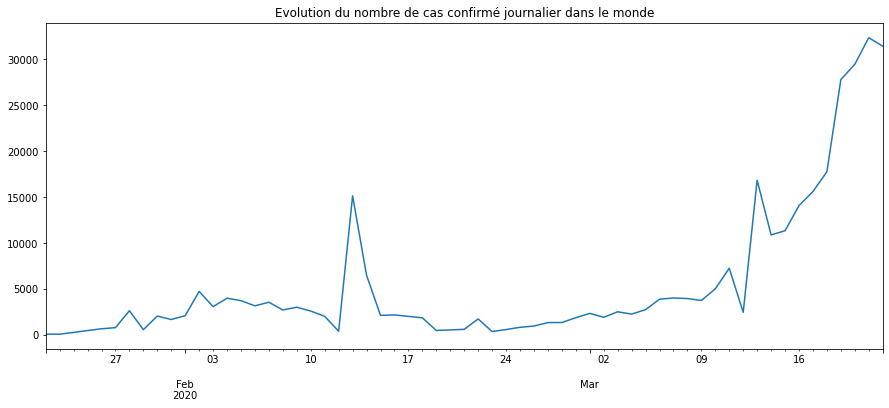

In [0]:
df_tot_conf_pred_diff.index = pd.to_datetime(df_tot_conf_pred_diff.index)
resamp_tot_conf_pred_diff = df_tot_conf_pred_diff.resample('D').mean().fillna(method="bfill")
resamp_tot_conf_pred_diff.plot(title = "Evolution du nombre de cas confirmés journalier dans le monde",figsize = (15, 6))
plt.show()

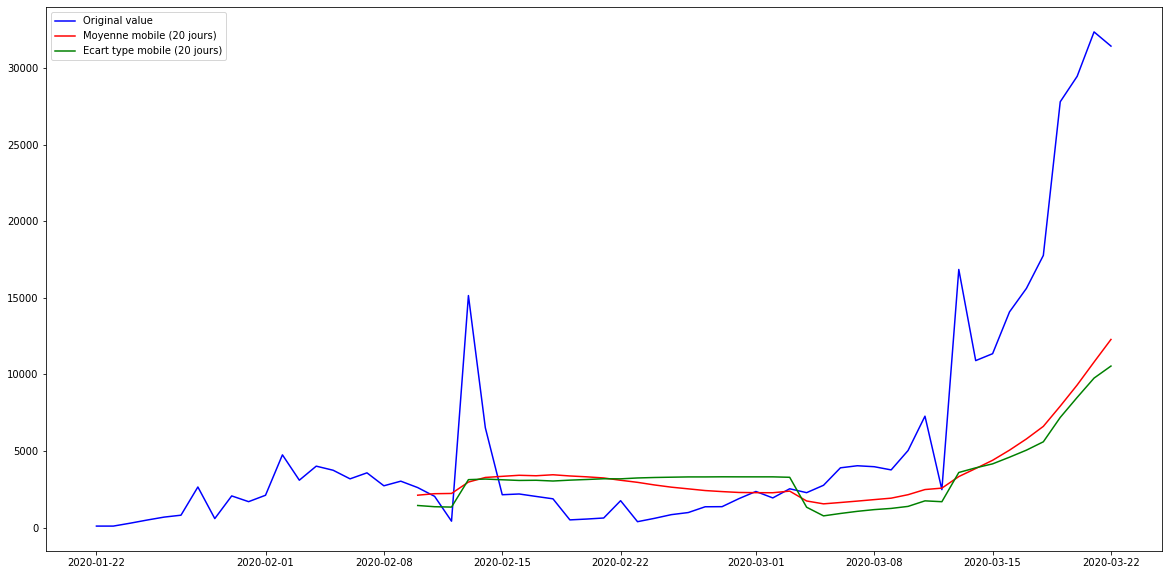

In [0]:
moy_mob_20 =  resamp_tot_conf_pred_diff.rolling(20).mean()
std_20 = resamp_tot_conf_pred_diff.rolling(20).std()

plt.plot(resamp_tot_conf_pred_diff, color = 'blue', label = "Original value")
plt.plot(moy_mob_20, color= 'red',  label = "Moyenne mobile (20 jours)")
plt.plot(std_20, color= 'green',  label = "Ecart type mobile (20 jours)")
plt.legend(loc='best')

Par le graphique ci-dessus, nous pouvons affirmer que la série n'est pas une série stationnaire (du fait que la moyenne mobile et l'écart type ne sont pas constants).

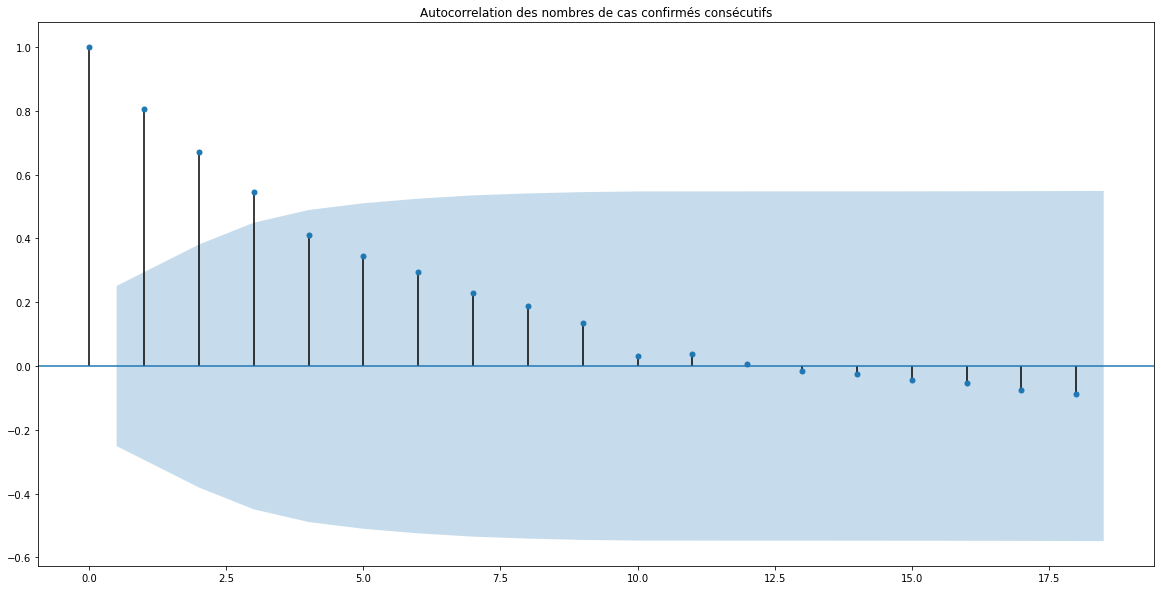

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
a=plot_acf(resamp_tot_conf_pred_diff, title= 'Autocorrelation des nombres de cas confirmés consécutifs')

L'auto-correlation permet de savoir si un modèle de régression linéaire peut être appliqué pour la prédiction ou si un modêle plus complexe doit être choisi. Effectivement, pour utiliser un modèle de régression linéaire, il ne doit y avoir aucune auto-corrélation entre les valeurs consécutives. Plus la valeur d'auto-corrélation est proche de 1 ou de -1, plus les valeurs sont auto-corrélées. Inversement lorsqu'elles se rapprochent de 0.

Nous pouvons donc voir que pour un nombre de valeurs consécutives faibles, l'auto-corrélation est assez forte, mais dès que nous prenons un plus grand nombre de valeurs consécutives, l'auto-corrélation diminue rapidement. Nous pourrions donc penser qu'un modèle de régression linéaire serait plus adapté pour notre prédiction. Cependant, l'intervalle de confiance tracé en bleu nous montre que qu'à partir de 4 valeurs consécutives et plus, on ne peut pas statistiquement affirmer que les valeurs sont corrélées. Nous ne pouvons pas non plus affirmer que les valeurs ne sont pas corrélées.

Nous pouvons donc essayer d'utiliser deux modèles exponentiels puis un modèle de régression linéaire et voir lequel nous donne les meilleurs performances.

Nous présenterons ci-dessous les résultats des deux modèles exponentiels. 
Nous allons commencer par appliquer un modèle d'exponentiel simple pour notre prédiction.

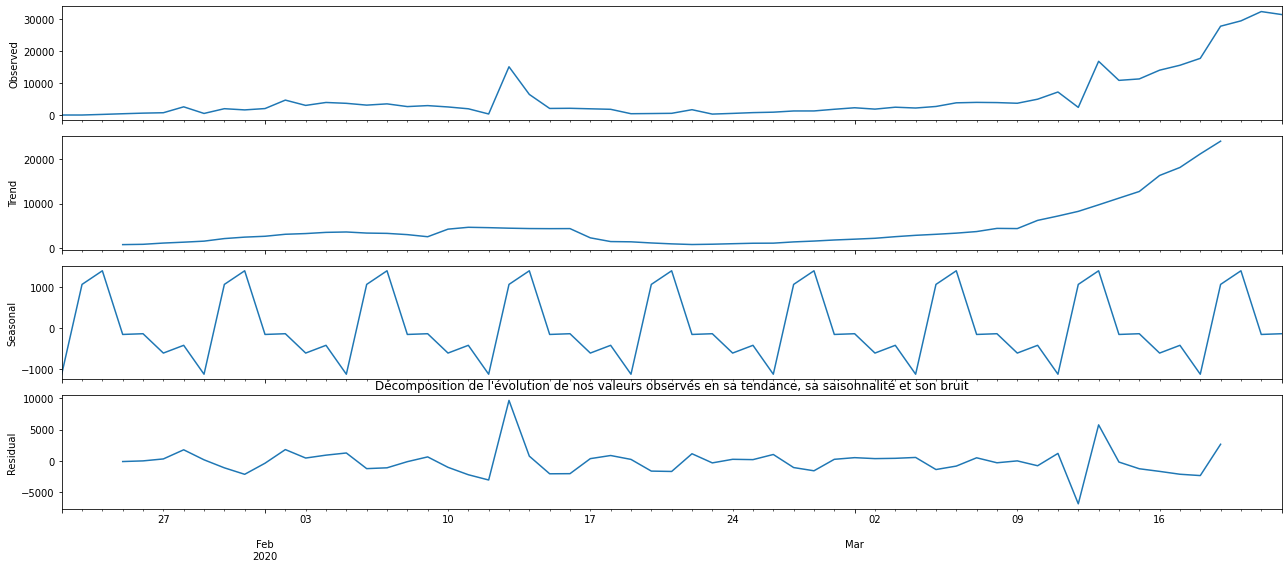

In [0]:
rcParams['figure.figsize'] = 18, 8
decomposition_resamp_tot_conf_pred_diff = sm.tsa.seasonal_decompose(resamp_tot_conf_pred_diff, model='additive')
decomposition_resamp_tot_conf_pred_diff.plot()
plt.title("Décomposition de l'évolution de nos valeurs observées en sa tendance, sa saisonnalité et son bruit")
plt.show()

Grâce à ces 4 courbes, nous pouvons voir que la période de nos données est de 7 jours. Cela nous sera utile pour le modèle ExponentialSmoothing.

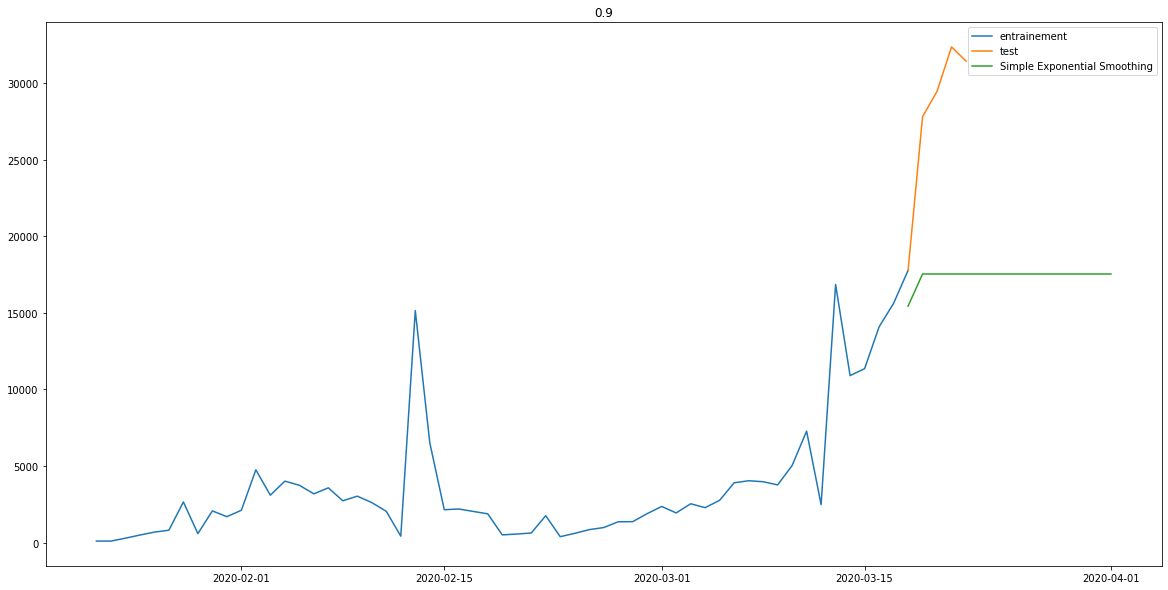

In [0]:
from statsmodels.tsa.api import SimpleExpSmoothing

zone_entrainement = resamp_tot_conf_pred_diff['2020-01-22 00:00:00': '2020-03-18 00:00:00']
zone_test = resamp_tot_conf_pred_diff['2020-03-18 00:00:00': '2020-03-22 00:00:00']

rcParams['figure.figsize'] = 20, 10
# Simple Exponential Smoothing
model = SimpleExpSmoothing(zone_entrainement).fit(smoothing_level=0.9)
pred = model.predict(start=zone_test.index[0], end="2020-04-01 00:00:00")
plt.title(model.params['smoothing_level'])
# plot
plt.plot(zone_entrainement.index, zone_entrainement, label='entrainement')
plt.plot(zone_test.index, zone_test, label='test')
#plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Simple Exponential Smoothing')
plt.legend(loc='best')

Cette prédiction n'est pas très satisfaisante. Nous allons donc utiliser un modèle d'exponentiel smoothing au lieu d'un modèle d'exponentiel simple.

#### Dans ce modèle ExponentialSmoothing, nous fixons le paramètre trend à multiplicatif. En effet, d'après les 4 graphes de décomposition plus haut, la moyenne semble exponentiel. Cependant, la saisonnalité semble être additive, nous fixons donc ce paramêtre comme additif.

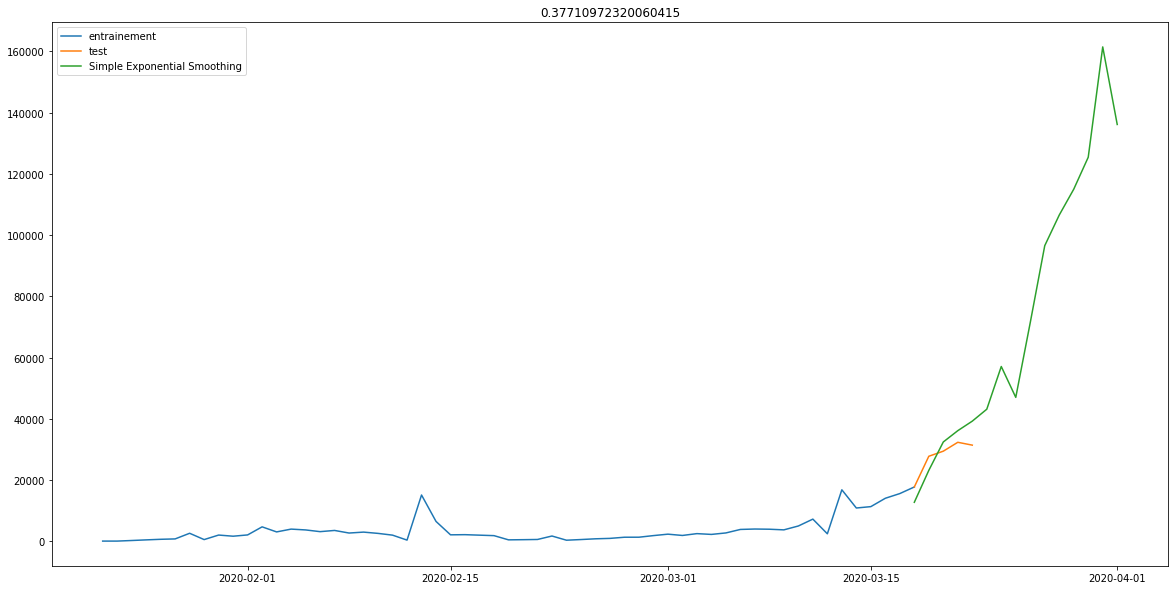

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing

rcParams['figure.figsize'] = 20, 10
# Exponential Smoothing
model = ExponentialSmoothing(zone_entrainement, seasonal='add', trend='mul',seasonal_periods=7).fit(use_boxcox=True)
pred = model.predict(start=zone_test.index[0], end="2020-04-01 00:00:00")
plt.title(model.params['smoothing_level'])
# plot
plt.plot(zone_entrainement.index, zone_entrainement, label='entrainement')
plt.plot(zone_test.index, zone_test, label='test')
#plt.plot(train.index, model.fittedvalues, label='Fitted values')
plt.plot(pred.index, pred, label='Simple Exponential Smoothing')
plt.legend(loc='best')

Nous pouvons voir que la prédiction n'est toujours pas optimale, cependant les valeurs que nous avons ne permettent pas non plus de faire une prévision excellente car nos données s'arrètent en pleine croissance.

Nous pouvons tout de même estimé, en voyant cette courbe, que s'il n'y avait pas eu le confinement, le nombre de nouveaux cas journaliers du coronavirus dans le monde le 31 mars serait approximativement de 16 000 et le premier avril de 14 000. 

Si nous poussons la prédiction un peu plus loin, le modèle trace une exponentiel qui ne representerait pas réellement le nombre de cas possible par jour. En effet, nous n'avons pas pris en compte le confinement et également le fait que plus il y a de presonnes infectées, plus le nombre de personnes qui peuvent être infectées diminue (la population mondiale n'est pas infinie).

> ### *3.2 Evolution future du nombre de cas confirmés pour les pays Européens et temps de doublement de personnes atteintes par le Covid-19 pour chaque pays*.

Une prédiction pour les pays européens notamment peut être calculée. Cette analyse permettra de donner un plateau "futur" que devrait atteindre les pays en nombre de cas confirmés.

In [0]:
# Data of confirmed over time for all different countries
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data_C_times&European.csv', sep=',', header=0)

# Selecting data for European or Union countries
data_Europe = data.loc[data['Europe'] == 'Yes']
data_EU     = data.loc[data['EU']     == 'Yes']

# Remove unnecessary columns 
data = data_Europe.copy()
data.drop(['Europe', 'EU'], axis=1, inplace=True)
data.drop(data.columns[0:1], axis=1, inplace=True)

In [0]:
# Check
data

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
6,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746
8,Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,...,1674,2041,2416,2851,3619,4525,5334,5639,6965,7713,8327,8844,9680,10248,10779,11204,11599,11858,12128,12374,12717,13020,13322,13634,13885,14024,14120,14305,14415,14555,14674,14750,14830,14876,14954,15006,15083,15152,15229,15307
9,Azerbaijan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,44,44,53,65,72,87,93,122,165,182,209,273,298,359,400,443,521,584,641,717,822,926,991,1058,1098,1148,1197,1253,1283,1340,1373,1398,1436,1480,1518,1548,1592,1617,1645
14,Belarus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51,51,69,76,76,81,81,86,86,94,94,94,152,152,163,304,351,440,562,700,861,1066,1486,1981,2226,2578,2919,3281,3728,4204,4779,4779,4779,6264,6723,7281,8022,8773,9590,10463
15,Belgium,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1486,1795,2257,2815,3401,3743,4269,4937,6235,7284,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138,37183,38496,39983,40956,41889,42797,44293,45325,46134
20,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,63,89,93,126,136,166,176,191,237,258,323,368,420,459,533,579,624,654,674,764,804,858,901,946,1009,1037,1083,1110,1167,1214,1268,1285,1309,1342,1368,1413,1421,1486,1516
24,Bulgaria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,92,94,127,163,187,201,218,242,264,293,331,346,359,399,422,457,485,503,531,549,577,593,618,635,661,675,685,713,747,800,846,878,894,929,975,1024,1097,1234,1247,1300
41,Croatia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,5,6,...,81,105,128,206,254,315,382,442,495,586,657,713,790,867,963,1011,1079,1126,1182,1222,1282,1343,1407,1495,1534,1600,1650,1704,1741,1791,1814,1832,1871,1881,1908,1950,1981,2009,2016,2030
43,Cyprus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,67,67,84,95,116,124,132,146,162,179,214,230,262,320,356,396,426,446,465,494,526,564,595,616,633,662,695,715,735,750,761,767,772,784,790,795,804,810,817


**Why logistic function?**

A logistic curve is a S-shaped curve (explaining why it is often called a sigmoid) representing the logistic function, whose equation is:

$$f(x)=\frac{a}{1+e^{-b(x-c)}} $$

where:
- $a$ is curve's maximum value (or plateau, or asymptote)
- $b$ is steepness (or logistic growth rate), proportional to the slope of the curve at the midpoint $(c, a/2)$
- $c$ is the abscissa value of the sigmoid's inflexion point, also called displacement (translates the graph to the left or right along the $x$-axis without changing the shape of the curve)

The logistic function has some mathematical characteristics explaining its wide use in epidemiological data analysis models: if the plateau a is taken as unit, then it varies from $0$ to $1$ as the probability of occurrence of a binary event (such as disease / no disease), and its graphic representation, sigmoid form, corresponds fairly closely to the model of development of an epidemic, when a limiting factor intervenes to curb its growth.

In [0]:
# Utilisation d'une fonction logistique
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

df = pd.DataFrame(columns=['Country', 'asymptote', 'steepness', 'displacement'])

#########################
# Select common abscissas
#########################

# Number of numerical columns in data file
N = data.shape[1]

# Set abscissas in the same number as the NUMERICAL columns 
# and create an array of abscissas
xdata = [x for x in range(N-2)]
xdata = np.array(xdata, dtype=float)


#########################
# Select data by country
#########################

for i in data['Country']:
   
    ydata = data.loc[data['Country'] == i]
    ydata = ydata.drop(ydata.columns[[0, 1]], axis=1)
    ydata = ydata.values.tolist()
    ydata = ydata[0]
    ydata = np.array(ydata, dtype=float)
    
    # Initial guess values
    a = ydata[-1]
    b = 0.15
    c = xdata[-1]
    guess = np.array([a, b, c])

    popt, pcov = curve_fit(sigmoid, xdata, ydata, guess)
    
    df = df.append({'Country' : i, 'asymptote' : popt[0], 'steepness' : popt[1], 'displacement' : popt[2]} , ignore_index=True)

In [0]:
# Check
df

,Country,asymptote,steepness,displacement
0,Albania,771.243934,0.108783,75.974394
1,Armenia,1819.056116,0.112050,77.081698
2,Austria,14821.193532,0.202310,64.361988
3,Azerbaijan,1658.102494,0.178391,76.386365
4,Belarus,16486.813510,0.164501,91.106936
5,Belgium,48978.544172,0.133896,76.648023
6,Bosnia and Herzegovina,1557.285841,0.143028,75.651056
7,Bulgaria,1683.642765,0.087608,83.718859
8,Croatia,2028.607487,0.154372,70.761319
9,Cyprus,839.206835,0.160785,72.420991


Les valeurs de la colonne 'asymptote' renseignent sur le nombre de cas confirmés que va voir un pays. Cependant, cette prédiction est faite avec les données actuelles et ne prend pas en compte les possibles mesures qui peuvent rentrer en vigueur dans chaque pays (confinement, interdiction de sorties, non reprise du travail pour la quasi totalité du pays...). Pour la France, il est prévu plus de 180 000 personnes atteintes du Covid-19.

In [0]:
# Create hard .csv files of sigmoid values for all European countries

path = '/content/drive/My Drive/Colab Notebooks/'

df.to_csv(path + 'data_sigmoid_parameters_European.csv')

In [0]:
##################           File creation Current data           ##################
# 'Comparison of current data on confirmed cases and predictions'
# 'Display of the number of confirmed cases in France, Italy and the United Kingdom'

data_selec = data[data['Country'].isin(['France','Italy','United Kingdom'])]

# Drop unnecessary columns
data_selec.drop(data_selec.columns[0:1], axis=1, inplace=True)

# The dataframe index becomes a name and not a number
data_selec.index = ["France","Italy","United Kingdom"]

In [0]:
# Check
data_selec

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,101,131,...,9131,10977,12769,14474,16266,20146,22645,25631,29584,33444,38147,40754,45219,52879,57804,59989,65266,69566,71485,75420,79242,83138,87450,91828,94955,121805,125487,130458,133678,146168,148178,148180,153105,155487,158262,156074,158397,160046,161738,162314
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,656,889,1129,1695,...,35832,41154,47165,53722,59313,64114,69363,74594,80797,86721,92696,97913,101969,106028,110810,115487,120072,124891,129214,132813,135865,139701,143959,147921,152627,156719,159872,162859,165527,169367,172869,176380,179433,181690,184433,187815,190474,193507,195864,198213
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,...,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949,61474,65872,74605,79874,85206,89570,94845,99483,104145,109769,115314,121172,125856,130172,134638,139246,144640,149569,154037


In [0]:
# Transposition of the dataframe
data_selec_transp = data_selec.transpose()
data_selec_transp

,France,Italy,United Kingdom
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,2,0,0
1/25/20,3,0,0
1/26/20,3,0,0
...,...,...,...
4/22/20,156074,187815,134638
4/23/20,158397,190474,139246
4/24/20,160046,193507,144640
4/25/20,161738,195864,149569


In [0]:
# Ajout cellules vides pour la prédiction
data_selec_transp2 = data_selec_transp

#df = pd.DataFrame(columns=['France', 'Italy', 'United Kingdom'])

ds = pd.DataFrame(
          [
              [0, 0, 0]
          ],
          columns = [
              "France",
              "Italy",
              "United Kingdom"
          ]
     )

for i in range(30):
  data_selec_transp2 = pd.concat([data_selec_transp2, ds], ignore_index=True)

data_selec_transp2

,France,Italy,United Kingdom
0,0,0,0
1,0,0,0
2,2,0,0
3,3,0,0
4,3,0,0
...,...,...,...
121,0,0,0
122,0,0,0
123,0,0,0
124,0,0,0


In [0]:
#######################           File creation Current data           #######################
# 'Comparison of current data on confirmed cases and predictions'
# 'Display of the number of confirmed cases expected in France, Italy and the United Kingdom'

data_pred = df[df['Country'].isin(['France','Italy','United Kingdom'])]

# Drop unnecessary columns
data_pred.drop(data_pred.columns[0:1], axis=1, inplace=True)

# The dataframe index becomes a name and not a number
data_pred.index = ["France","Italy","United Kingdom"]

In [0]:
# Check
data_pred

,asymptote,steepness,displacement
France,182802.708826,0.133405,76.005008
Italy,196007.045657,0.120038,67.101132
United Kingdom,170810.156651,0.140837,80.290936


In [0]:
data_selec_transp2['x'] = range(126)
data_selec_transp2

,France,Italy,United Kingdom,x
0,0,0,0,0
1,0,0,0,1
2,2,0,0,2
3,3,0,0,3
4,3,0,0,4
...,...,...,...,...
121,0,0,0,121
122,0,0,0,122
123,0,0,0,123
124,0,0,0,124


In [0]:
# Creation of the parameters for the sigmoid course

# France
a = data_pred.loc["France","asymptote"]
b = data_pred.loc["France","steepness"]
c = data_pred.loc["France","displacement"]

data_selec_transp2['Fs'] = data_selec_transp2['x'].map(lambda x: a / (1 + np.exp(-b*(x-c))))

# Italy
a = data_pred.loc["Italy","asymptote"]
b = data_pred.loc["Italy","steepness"]
c = data_pred.loc["Italy","displacement"]

data_selec_transp2['Is'] = data_selec_transp2['x'].map(lambda x: a / (1 + np.exp(-b*(x-c))))

# United Kingdom
a = data_pred.loc["United Kingdom","asymptote"]
b = data_pred.loc["United Kingdom","steepness"]
c = data_pred.loc["United Kingdom","displacement"]

data_selec_transp2['Us'] = data_selec_transp2['x'].map(lambda x: a / (1 + np.exp(-b*(x-c))))

data_selec_transp2

,France,Italy,United Kingdom,x,Fs,Is,Us
0,0,0,0,0,7.218700,62.232131,2.096748
1,0,0,0,1,8.248853,70.166390,2.413848
2,2,0,0,2,9.426009,79.111815,2.778904
3,3,0,0,3,10.771141,89.197161,3.199169
4,3,0,0,4,12.308216,100.567550,3.682990
...,...,...,...,...,...,...,...
121,0,0,0,121,182351.858137,195703.837263,170259.149538
122,0,0,0,122,182408.043047,195738.087218,170331.331784
123,0,0,0,123,182457.239471,195768.473066,170394.081222
124,0,0,0,124,182500.313561,195795.429755,170448.624874


In [0]:
########### On sépare le tableau en 2 pour afficher 2 graphes différents ###########
# 1ere dataframe : Nombre de cas confirmés actuels

# Drop unnecessary columns
data_pays = data_selec_transp2[['France', 'Italy', 'United Kingdom']]

data_pays.reset_index(inplace = True)

# Drop unnecessary columns
data_pays.drop(['index'], axis='columns', inplace=True)

In [0]:
# Check
data_pays

,France,Italy,United Kingdom
0,0,0,0
1,0,0,0
2,2,0,0
3,3,0,0
4,3,0,0
...,...,...,...
121,0,0,0
122,0,0,0
123,0,0,0
124,0,0,0


In [0]:
########### On sépare le tableau en 2 pour afficher 2 graphes différents ###########
# 2eme dataframe : Nombre de cas prévus

# Drop unnecessary columns
data_pays_prevus = data_selec_transp2[['Fs', 'Is', 'Us']]

data_pays_prevus.reset_index(inplace = True)

# Drop unnecessary columns
data_pays_prevus.drop(['index'], axis='columns', inplace=True)

In [0]:
# Check
data_pays_prevus

,Fs,Is,Us
0,7.218700,62.232131,2.096748
1,8.248853,70.166390,2.413848
2,9.426009,79.111815,2.778904
3,10.771141,89.197161,3.199169
4,12.308216,100.567550,3.682990
...,...,...,...
121,182351.858137,195703.837263,170259.149538
122,182408.043047,195738.087218,170331.331784
123,182457.239471,195768.473066,170394.081222
124,182500.313561,195795.429755,170448.624874


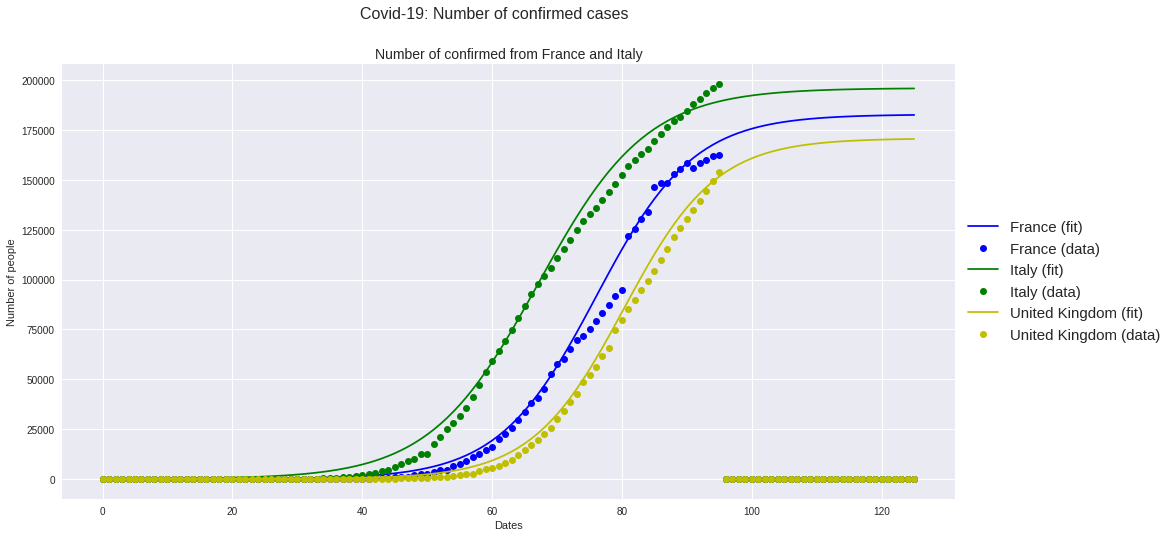

In [0]:
##################          Creation of graphics          ##################
# 'Comparison of current data on confirmed cases and predictions'

# Plotting values dataframe
x = range(126)

plt.style.use('seaborn')
plt.figure(figsize=(16, 8))

plt.plot(x, data_pays_prevus['Fs'], '-', label='France (fit)', color='b')
plt.plot(x, data_pays['France'], 'o', label='France (data)', color='b')

plt.plot(x, data_pays_prevus['Is'], '-', label='Italy (fit)', color='g')
plt.plot(x, data_pays['Italy'], 'o', label='Italy (data)', color='g')

plt.plot(x, data_pays_prevus['Us'], '-', label='United Kingdom (fit)', color='y')
plt.plot(x, data_pays['United Kingdom'], 'o', label='United Kingdom (data)', color='y')

plt.xlabel('Dates')
plt.ylabel('Number of people')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop = {'size': 15})
plt.suptitle('Covid-19: Number of confirmed cases', fontsize=16)
plt.title('Number of confirmed from France and Italy', fontsize=14)
plt.show()

On a donc une prédiction qui s'est affichée et qui suit les valeurs réelles de cas confirmés. Ceci montre que l'utilisation d'une telle fonction est appropriée. On remarque qu'un plateau du nombre de cas confirmés sera atteint pour ces 3 pays au mois de mai (les valeurs réelles prises s'arrêtent le 28 avril ici). 

Le cas de l'Italie est intéressant puisqu'il montre que les données actuelles du pays ont dépassées la courbe de la sigmoide, et donc la prédiction faite. Ceci montre que les cas testés du Covid-19 en Italie est toujours en évolutoin et que la pandémie du virus n'est pas finie dans le pays. En effet celui-ci n'a pas encore atteint un plateau et un nombre constant de personnes ayant le Covid-19. L'Italie n'a pas encore commencé à se stabiliser, contrairement à la France dont les valeurs réelles semblent se stabiliser.

Le temps de doublement est un paramètre intéressant à calculer, puisqu'il montre le nombre de jours où le nombre de cas confirmés a doublé au début de l'épidémie. C'est à dire quand les différents pays étaient en pleine croissance de cas atteints par le Covid-19, donc quand les courbes ci-dessus étaient exponentielles.

In [0]:
################     Temps de doublement     ################

df['doubling'] = df['steepness'].map(lambda steepness: 2*np.log(2) / (steepness))

df

,Country,asymptote,steepness,displacement,doubling
0,Albania,771.243934,0.108783,75.974394,12.743698
1,Armenia,1819.056116,0.112050,77.081698,12.372126
2,Austria,14821.193532,0.202310,64.361988,6.852335
3,Azerbaijan,1658.102494,0.178391,76.386365,7.771117
4,Belarus,16486.813510,0.164501,91.106936,8.427267
5,Belgium,48978.544172,0.133896,76.648023,10.353541
6,Bosnia and Herzegovina,1557.285841,0.143028,75.651056,9.692436
7,Bulgaria,1683.642765,0.087608,83.718859,15.823783
8,Croatia,2028.607487,0.154372,70.761319,8.980217
9,Cyprus,839.206835,0.160785,72.420991,8.622057


**Estimating a doubling time from a sigmoid curve**

Assume the evolution of a certain phenomenon is described by a sigmoid curve:

$$f(x)=\frac{a}{1+e^{-b(x-c)}} $$

On the interval $x$∈$[0;c]$, (first period of growth where c a point on the abscissa), we want to estimate the doubling time $δ$, defined by $y(x+δ)=2y(x)$. As $δ$ is $x$-dependent on a sigmoid curve, we need to approximate the sigmoid by an exponential $z=αe^βx$, for which the doubling time is constant and equal to $ln⁡(2)⁄β$.

Simple method: assume the two curves are tangent at the point $P=(c,a⁄2)$. This assumption means:

- 	their values at $P$ are equal:
$$z(c)=αe^βc=y(c)=a/2     \qquad [1]$$

- 	their derivatives at $P$ are equal:
$$y^{'} (x)={ab}\frac{e^{-b(x-c)}}{(1+e^{-b(x-c)})^2} \quad{}⇒\quad{} y^{'}(c)=\frac{ab}{4}$$

$$z^{'}(x)=αβe^βx \quad{}⇒\quad{} z^{'}(c)=αβe^βc$$

- Then:
$$z^{'}(c)=αβe^βc=β(αe^{βc})=β \frac {a}{2}=y^{'}(c)=\frac{ab}{4}  \qquad    [2]$$

- From [2], one gets:
$${β}=\frac{b}{2}$$

- The doubling time can therefore be estimated (on $x$∈$[0;c]$) by:
$${δ}=\frac{\ln⁡(2)}{β}=\frac{2 \ln⁡(2)}{b}$$


Pour la France, le temps de doublement est ainsi de 10 jours, ce qui correspond au nombre de jours où le nombre de cas confirmés a doublé au début de l'épidémie.